<h1>ESC 4주차 세션 : Advanced CNN<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-1">Intro</a></span><ul class="toc-item"><li><span><a href="#torchvision-package." data-toc-modified-id="torchvision-package.-1.1">torchvision package.</a></span></li><li><span><a href="#ILSVRC" data-toc-modified-id="ILSVRC-1.2">ILSVRC</a></span></li></ul></li><li><span><a href="#AlexNet" data-toc-modified-id="AlexNet-2">AlexNet</a></span><ul class="toc-item"><li><span><a href="#Tip)-소스코드-쉽게-보기" data-toc-modified-id="Tip)-소스코드-쉽게-보기-2.1">Tip) 소스코드 쉽게 보기</a></span></li></ul></li><li><span><a href="#VGGNet" data-toc-modified-id="VGGNet-3">VGGNet</a></span><ul class="toc-item"><li><span><a href="#VGG-Design-Rules" data-toc-modified-id="VGG-Design-Rules-3.1">VGG Design Rules</a></span></li><li><span><a href="#Source-Code" data-toc-modified-id="Source-Code-3.2">Source Code</a></span></li></ul></li><li><span><a href="#GoogLeNet-(a.k.a.-Inception-V1)" data-toc-modified-id="GoogLeNet-(a.k.a.-Inception-V1)-4">GoogLeNet (a.k.a. Inception V1)</a></span><ul class="toc-item"><li><span><a href="#GoogLeNet-Design-Rules" data-toc-modified-id="GoogLeNet-Design-Rules-4.1">GoogLeNet Design Rules</a></span></li></ul></li><li><span><a href="#ResNet" data-toc-modified-id="ResNet-5">ResNet</a></span><ul class="toc-item"><li><span><a href="#왜-Residual-Network라고-불릴까?" data-toc-modified-id="왜-Residual-Network라고-불릴까?-5.1">왜 Residual Network라고 불릴까?</a></span></li><li><span><a href="#ResNet-Design-Rules" data-toc-modified-id="ResNet-Design-Rules-5.2">ResNet Design Rules</a></span></li><li><span><a href="#Source-Code" data-toc-modified-id="Source-Code-5.3">Source Code</a></span><ul class="toc-item"><li><span><a href="#참고)" data-toc-modified-id="참고)-5.3.1">참고)</a></span></li></ul></li></ul></li><li><span><a href="#Wrap-up" data-toc-modified-id="Wrap-up-6">Wrap-up</a></span><ul class="toc-item"><li><span><a href="#Comparing-Complexity" data-toc-modified-id="Comparing-Complexity-6.1">Comparing Complexity</a></span></li><li><span><a href="#The-Next-Step-of-CNN" data-toc-modified-id="The-Next-Step-of-CNN-6.2">The Next Step of CNN</a></span></li></ul></li><li><span><a href="#숙제-:)" data-toc-modified-id="숙제-:)-7">숙제 :)</a></span><ul class="toc-item"><li><span><a href="#1.-colab-GPU를-사용해서-VGG-돌려보기" data-toc-modified-id="1.-colab-GPU를-사용해서-VGG-돌려보기-7.1">1. colab GPU를 사용해서 VGG 돌려보기</a></span></li><li><span><a href="#2.-colab-GPU로-ResNet-돌려보기" data-toc-modified-id="2.-colab-GPU로-ResNet-돌려보기-7.2">2. colab GPU로 ResNet 돌려보기</a></span></li></ul></li></ul></div>

## Intro  
### torchvision package. 
https://pytorch.org/docs/stable/torchvision/index.html  
\- 유명한 데이터셋(torchvision.datasets), 유명한 모델(torchvision.models), 이미지 전처리/변환 툴(torchvision.transforms), 쉽게 읽어오게하는 툴(torchvision.utils)로 구성됨  
\- datasets : MNIST, COCO, ImageNet, CIFAR, STL10, etc.  
\- models : AlexNet, VGG, ResNet, DenseNet, Inception, GoogLeNet, etc.  
  
### ILSVRC  
ILSVRC은 ImageNet Large Scale Visual Recognition Challenge의 약자로 이미지 인식(image recognition) 경진대회이다. 대용량의 image set을 주고 이미지 분류 알고리즘의 성능을 평가하는 대회로 2010년에 시작되었다. 이 대회에서 우승한 알고리즘들이 컴퓨터 비전 분야 발전에 큰 역할을 해왔다. 이른바 대세 알고리즘들이 되었다. 
  
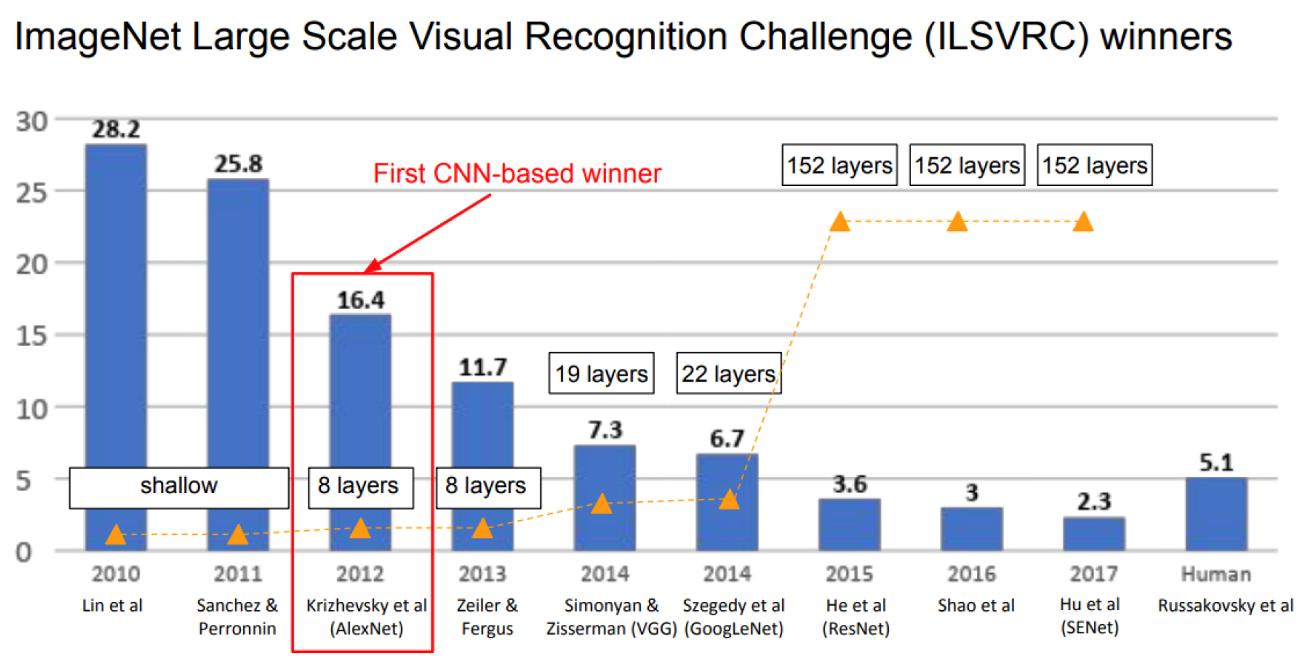  
  
2010년, 2011년에 우승을 차지한 알고리즘들은 얕은 구조(shallow architecture)를 가진 것들이었다. 얕은 구조를 가진 알고리즘에서는 이미지 인식에 유용할만한 특성들을 개발자들이 임의로 결정해서 도출했다. 그러나 2012년 CNN 기반 딥러닝 알고리즘 AlexNet이 우승을 차지한 이후에는 깊은 구조(deep architecture)를 가진 알고리즘들이 우승을 차지했다. AlexNet은 약 26%였던 인식 오류율을 16%까지 낮췄다. 10%를 낮춘다는 것은 상상하기도 힘든 일이었다. 얕은 구조 기반 알고리즘들로는 0.1% 낮추는 것도 쉽지 않았기 때문이다. 

딥러닝 기반 알고리즘이 사용되면서 인식 오류는 확실하게 낮아졌다. 심지어 2015년에는 사람의 정확도라고 알려진 5%를 추월했다. 2017년의 SENet의 경우 2.3%로 사람의 인식 에러율의 절반도 안된다. 

여기서 우리는 AlexNet, VGG, GoogLeNet, ResNet 총 4개의 CNN architecture들을 살펴볼 것이다. 

## AlexNet  
  
처음으로 다룰 AlexNet은 2012년에 개최된 ILSVRC 대회의 우승을 차지한 CNN 구조로 CNN의 부흥에 아주 큰 역할을 한 구조라고 말할 수 있다. AlexNet의 original 논문명은 "ImageNet Classification with Deep Convolutional Neural Networks"이다. 이 논문의 첫번째 저자가 Alex Khrizevsky이기 때문에 그의 이름을 따서 AlexNet이라고 부른다. 
  
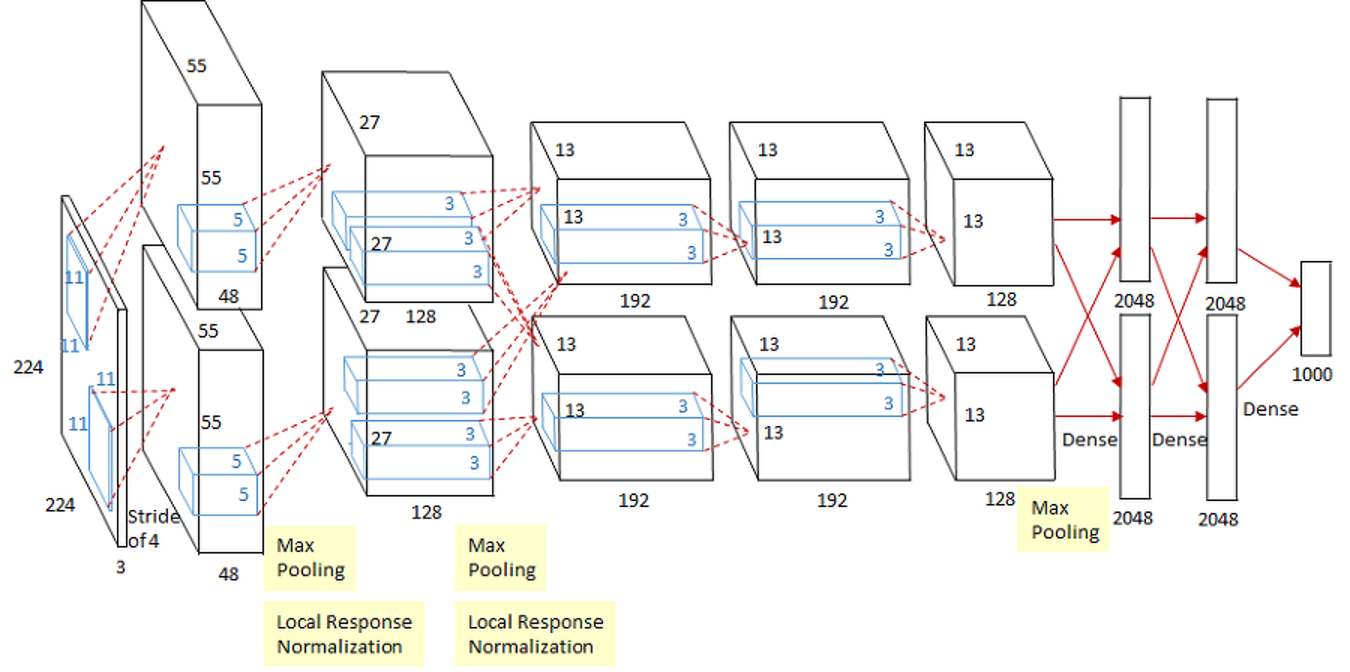  
  
AlexNet의 특이점은 2개의 GPU로 병렬연산을 수행하기 위해서 병렬적인 구조로 설계되었다는 것이다. 그 당시에 GTX580 GPU로 훈련되었는데 메모리 용량이 3GB밖에 되지 않았기 때문에 2개의 GPU를 사용하는 것이 불가피했다. 보면 (55x55x48)x2의 형태를 띤다. (TMI : 당시에 알렉스넷을 훈련시키기 위해 무려 6일이나 걸렸고 개발자 중에는 딥러닝 분야의 선구자인 Geoffrey Hinton도 포함되어 있다!)  
  
AlexNet은 8개의 레이어로 구성되어 있고 5개의 컨볼루션 레이어와 3개의 full-connected 레이어로 구성되어 있다. 
두번째, 네번째, 다섯번째 컨볼루션 레이어들은 전 단계의 같은 채널의 특성맵(feature map)들과만 연결되어 있는 반면, 세번째 컨볼루션 레이어는 전 단계의 두 채널의 특성맵들과 모두 연결되어 있다.

이전 shallow architecture (얇은 구조들)에 비하면 상당히 성능이 향상되었음을 살펴볼 수 있다. 그렇게 AlexNet은 불과 몇 년 전까지 널리 사용되었고 (지금도 종종 쓰이기는 한다) transfer learning (전이학습)에서 다양하게 사용되었다. 오랜기간동안 사용되고 유명한 모델이었지만 요즘 출현한 모델들이 전반적으로 더 좋은 성능을 보이면서 사람들이 갈아탔다.  
  
paper : https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf  

**AlexNet 그 후...**  
AlexNet 이후에 출현한 모델들의 가장 큰 특징은 “Deeper Networks”를 가진다는 점이다.  
VGGNet은 옥스포드 대학의 연구팀 VGG에 의해 개발된 모델로써, 2014년 이미지넷 이미지 인식 대회에서 준우승을 한 모델이다. 여기서 말하는 VGGNet은 16개 또는 19개의 층으로 구성된 모델을 의미한다(VGG16, VGG19로 불림). VGG-F, VGG-M, VGG-S라는 모델들 또한 존재하는데 이들은 우리가 다루는 VGG와는 차이가 있고 AlexNet과 유사한 모델들이다.역사적으로 봤을 때는 VGGNet 모델부터 시작해서 네트워크의 깊이가 확 깊어졌다.  
  
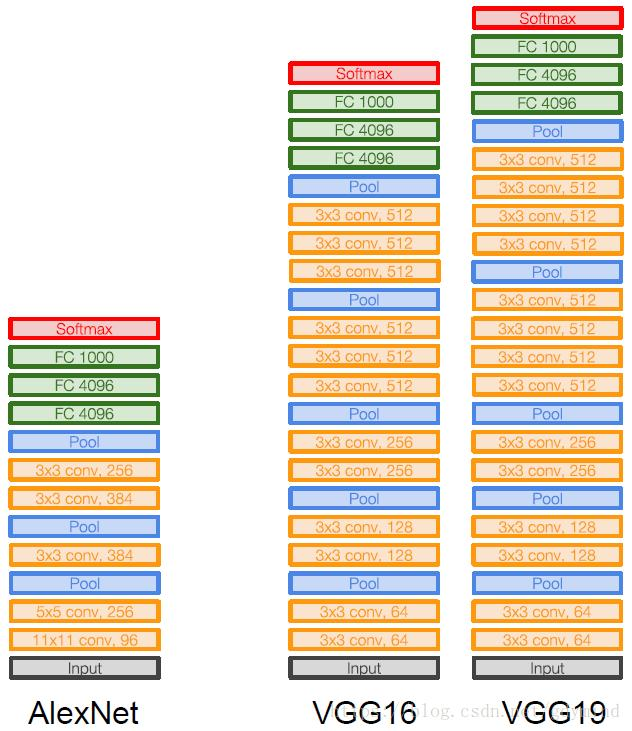  
  
2012년 (AlexNet), 2013년(ALexNet 개선한 모델) 우승 모델들은 8개의 층으로 구성되었었다. 반면 2014년의 VGGNet(VGG19)는 19층으로 구성되었고, 또한 GoogLeNet은 22층으로 구성되었다. 그리고 2015년에 이르러서는 152개의 층으로 구성된 ResNet이 제안되었다. 네크워크가 깊어질 수록 성능이 좋아졌음을 위 그림을 통해 확인할 수 있다. VGGNet은 사용하기 쉬운 구조와 좋은 성능 덕분에 그 대회에서 우승을 거둔 조금 더 복잡한 형태의 GoogLeNet보다 더 인기를 얻었다.  

### Tip) 소스코드 쉽게 보기  
`torchvision.models`에는 AlexNet을 포함해 앞으로 소개될 딥러닝 모델들의 소스코드가 포함되어 있다.  
  
파이토치 공식 구현 버전은 해당 깃허브 저장소의 model 디렉토리에서 볼수도 있다.  
url: https://github.com/pytorch/vision/tree/master/torchvision/models  
  
Lab에서도 나왔지만 직접 파일을 탐색기에서 찾아서 .py 파일을 볼 수도 있지만 (이 경우 pip install torchvision을 실행하면 저장된 경로를 알수 있다!) `inspect`라는 패키지를 사용해 모델의 구조를 확인할 수도 있다 :)

In [1]:
import torchvision
import inspect
print(inspect.getsource(torchvision.models.AlexNet))

class AlexNet(nn.Module):

    def __init__(self, num_classes=1000):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.D

## VGGNet  
    
VGGNet의 original 논문의 개요에서 밝히고 있듯이 이 연구의 핵심은 네트워크의 깊이를 깊게 만드는 것이 성능에 어떤 영향을 미치는지를 확인하고자 한 것이다. 해당 논문에서는 깊이의 영향만을 파악하기 위해 단순한 연산만을 가지고 모델을 구성했다.  
### VGG Design Rules  
\- All conv are 3x3 stride 1 padding 1   
\- All Max Poolings are 2x2 stride 2    
\- After pooling, double the number of channels
\- Use only conv/max pool/fully connected layers  
  
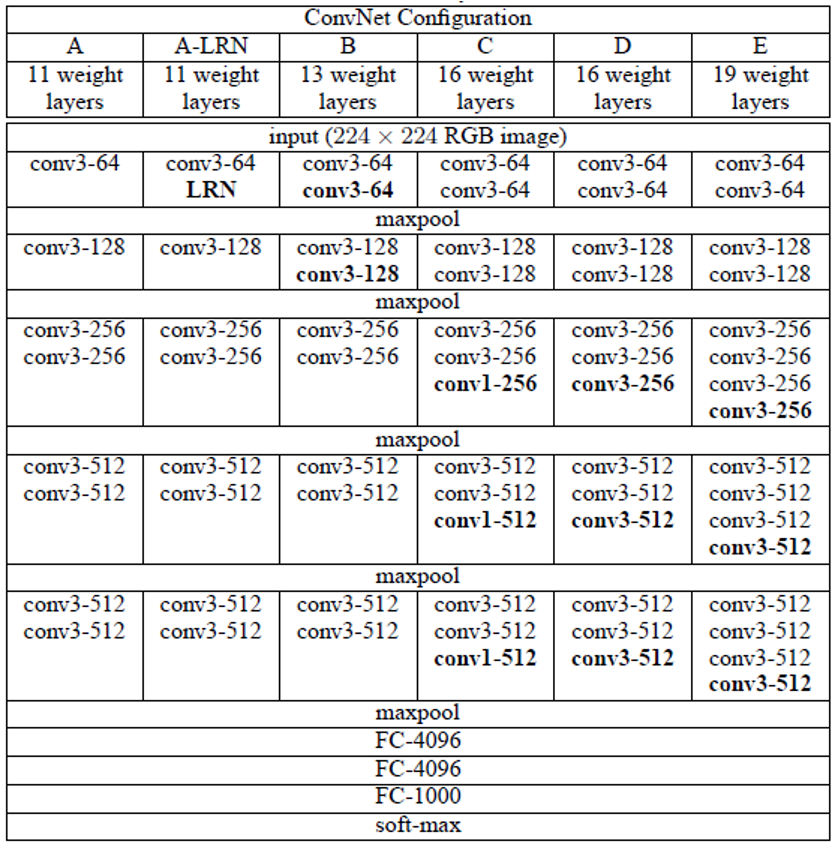  
  
* conv3-64는 하나의 합성곱 연산과 렐루 활성화 함수 블록을 의미하며 필터의 크기가 3, 필터의 수가 64개임을 의미한다. (패딩은 1)  
  
VGG 연구팀은 original 논문에서 총 6개의 구조(A, A-LRN, B, C, D, E)를 만들어 성능을 비교했다. 여러 구조를 만든 이유는 기본적으로 깊이의 따른 성능 변화를 비교하기 위함이다. 이중 D 구조가 VGG16이고 E 구조가 VGG19라고 보면 된다.  
논문에서는 깊이가 11층, 13층, 16층, 19층으로 깊어지면서 분류 에러가 감소하는 것을 관찰했다. 즉, 깊어질수록 성능이 좋아진다는 것이었다.  
우선 VGG의 구조를 자세히 다루기에 앞서 VGG는 3X3 필터만을 이용한다는 특징을 가지고 있다. 즉, 작은 필터로 더 깊은 네트워크를 가지고 있는모델이다.  
앞서 다뤘던 AlexNet과 비교한다면, AlexNet은 총 8개의 layer들을 가지고 VGG는 16~19개의 layer들을 가진다. 
또, VGG의 경우에는 3x3 conv (stride 1, pad 1) & 2X2 max pool (stride=2)만을 사용한다.  
  

**Q**. 그렇다면 왜 VGG는 3X3 cov라는 작은 필터만을 고집할까?  
  
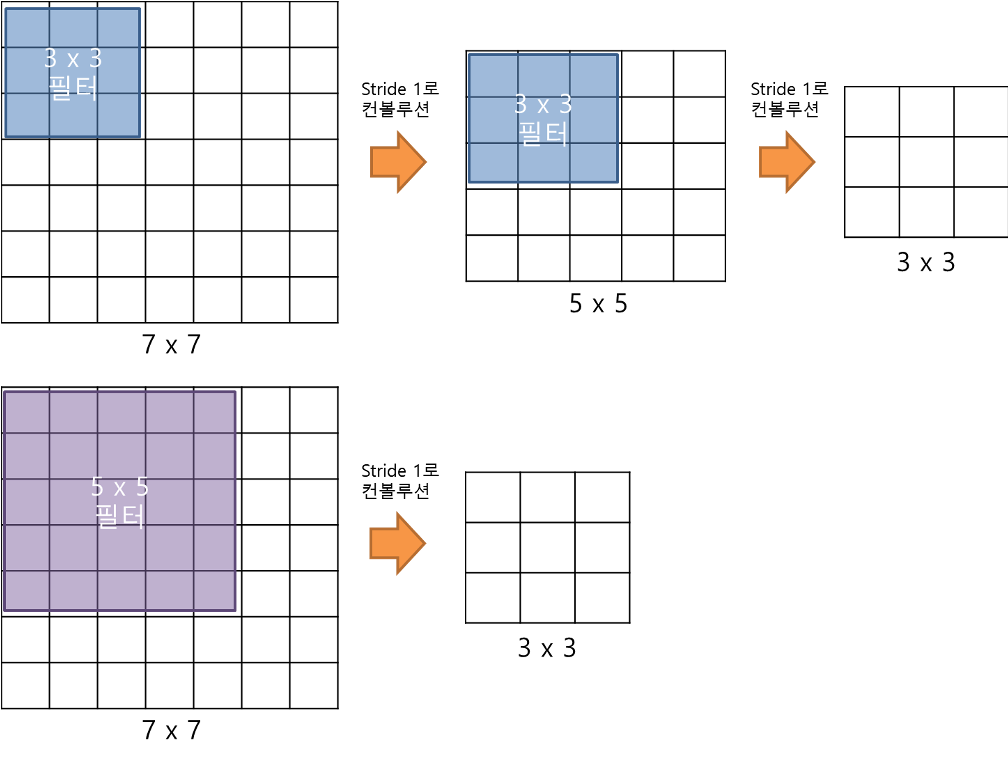   
  
그림을 보면, 3 x 3 필터로 두 차례 컨볼루션을 하는 것과 5 x 5 필터로 한 번 컨볼루션을 하는 것이 결과적으로 동일한 사이즈의 특성맵을 산출한다는 것을 알 수 있다.  
즉, 3 x 3 필터로 세 차례 컨볼루션 하는 것은 7 x 7 필터로 한 번 컨볼루션 하는 것과 대응된다.  
그러면 3 x 3 필터로 세 차례 컨볼루션을 하는 것이 7 x 7 필터로 한 번 컨볼루션하는 것보다 나은 점은 무엇일까? 일단 가중치 또는 파라미터의 개수의 차이다. 3 x 3 필터가 3개면 총 27개의 가중치를 갖는다. 반면 7 x 7 필터는 49개의 가중치를 갖는다. CNN에서 가중치는 모두 훈련이 필요한 것들이므로, 가중치가 적다는 것은 그만큼 훈련시켜야할 것의 개수가 작아진다. 따라서 학습의 속도가 빨라진다. 동시에 층의 개수가 늘어나면서 특성에 비선형성을 더 증가시키기 때문에 특성이 점점 더 유용해진다.  
  
VGGNet은 구조가 굉장히 uniform하다는 데에 매력이 있지만 학습시켜야 할 parameter가 많은 (138 million!) 무거운 모델이다. 여담으로, 대회를 위해 4대의 GPU를 가지고 2-3주간 학습시켰다고 한다.  
  
paper : https://arxiv.org/pdf/1409.1556.pdf  

### Source Code

**Cifar10 with VGGNet**

In [2]:
import torch
import torch.nn as nn

import torch.optim as optim

import torchvision
import torchvision.transforms as transforms
import warnings 
warnings.filterwarnings(action='ignore')

In [4]:
# import visdom

# vis = visdom.Visdom()
# vis.close(env="main")

In [3]:
def loss_tracker(loss_plot, loss_value, num):
    '''num, loss_value, are Tensor'''
    vis.line(X=num,
             Y=loss_value,
             win = loss_plot,
             update='append'
             )

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device =='cuda':
    torch.cuda.manual_seed_all(777)

In [5]:
transform = transforms.Compose(
    [transforms.ToTensor(),  ### 데이터 폼 텐서로 변환
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])  ### 정규화

trainset = torchvision.datasets.CIFAR10(root='./cifar10', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=512, ### batch_size 512로 수정
                                          shuffle=True, num_workers=0)  ### num_workers: 멀티 프로세스 값 (default=0: 메인프로세스만)

testset = torchvision.datasets.CIFAR10(root='./cifar10', train=False,
                                       download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=0)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')  ### label 값들 

Files already downloaded and verified
Files already downloaded and verified


In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
vis.images(images/2 + 0.5)

# show images
#imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

truck   dog horse truck


* visdom 창에 batch_size인 512개의 그림이 뜨는 것을 확인  
* 처음 4개 사진들의 라벨 확인

**make VGG16 using `vgg.py`**

In [7]:
import torchvision.models.vgg as vgg

In [8]:
cfg = [32,32,'M', 64,64,128,128,128,'M',256,256,256,512,512,512,'M'] #13 + 3 =vgg16

In [ ]:
'A': [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M']

def make_layers(cfg, batch_norm=False):
    layers = [] # empty layer
    in_channels = 3
    
    for v in cfg:
        if v == 'M':
            layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
        else:
            conv2d = nn.Conv2d(in_channels, v, kernel_size=3, padding=1)
            if batch_norm:
                layers += [conv2d, nn.BatchNorm2d(v), nn.ReLU(inplace=True)]
            else:
                layers += [conv2d, nn.ReLU(inplace=True)]
            in_channels = v
                     
    return nn.Sequential(*layers)

* 네트워크 구성 방식 설정 (VGG16)  
* 질문: 왜 vgg.py랑 위에서 지정한 'D'=vgg16과 layer 배열이 다른가?  
> vgg16이라고 굳이 구성이 똑같을 필요는 없다. convolution 13번 + fc 3번 구성만 같으면 모두 VGG16  
* 32 x 32를 받아서 3번의 Max Pooling을 거치므로, 32 - 16 - 8 - 4 So, 4 x 4로 변경

In [9]:
class VGG(nn.Module):

    def __init__(self, features, num_classes=1000, init_weights=True):
        super(VGG, self).__init__()
        self.features = features
        #self.avgpool = nn.AdaptiveAvgPool2d((7, 7))  ### vgg.py 에서는 (7,7)을 하도록 되어 있는데 이미지가 7by7보다 작으므로 굳이 할 필요 없음
        self.classifier = nn.Sequential(
            nn.Linear(512 * 4 * 4, 4096),  # 첫번째 classifier / 여기 역시 7 by 7이 아니라 4 by 4로 수정
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, 4096),  # 두번째 classifier
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, num_classes),  # 세번째 classifier
        )
        if init_weights:
            self._initialize_weights()

    def forward(self, x):
        x = self.features(x)
        #x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

In [10]:
vgg16= VGG(vgg.make_layers(cfg),10,True).to(device)

* num_classes 를 10으로 변경 / initialize_weight = True

In [11]:
a=torch.Tensor(1,3,32,32).to(device)
out = vgg16(a)
print(out)

tensor([[ 0.0106, -0.0032, -0.0128,  0.0104,  0.0072,  0.0080,  0.0174,  0.0172,
         -0.0125,  0.0156]], grad_fn=<AddmmBackward>)


* 모델이 잘 작동하는지 확인

In [12]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(vgg16.parameters(), lr = 0.005,momentum=0.9)

lr_sche = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.9)

* lr_scheduler.StepLR : epoch 50번 진행될 동안 고정된 learning rate 사용하기보다 줄여나감으로써 더 정밀한 학습  
* step_size=5, gamma=0.9 : 5번 마다 learning rate에 0.9 곱해줘서 update  
> 즉 epoch 5번 돌아간 후엔 0.005 * 0.9 가 새로운 Learning Rate가 됨

**make plot**

In [13]:
loss_plt = vis.line(Y=torch.Tensor(1).zero_(),opts=dict(title='loss_tracker', legend=['loss'], showlegend=True))

loss 값 나타낼 플랏

**Training**

In [16]:
print(len(trainloader))
epochs = 30

for epoch in range(epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    lr_sche.step()
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = vgg16(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 30 == 29:    # print every 30 mini-batches
            loss_tracker(loss_plt, torch.Tensor([running_loss/30]), torch.Tensor([i + epoch*len(trainloader) ]))
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 30))
            running_loss = 0.0
        

print('Finished Training')

98
[1,    30] loss: 2.302
[1,    60] loss: 2.299
[1,    90] loss: 2.281
[2,    30] loss: 2.194
[2,    60] loss: 2.123
[2,    90] loss: 2.067
[3,    30] loss: 1.958
[3,    60] loss: 1.875
[3,    90] loss: 1.758
[4,    30] loss: 1.715
[4,    60] loss: 1.654
[4,    90] loss: 1.623
[5,    30] loss: 1.547
[5,    60] loss: 1.511
[5,    90] loss: 1.533
[6,    30] loss: 1.518
[6,    60] loss: 1.426
[6,    90] loss: 1.407
[7,    30] loss: 1.382
[7,    60] loss: 1.369
[7,    90] loss: 1.340
[8,    30] loss: 1.296
[8,    60] loss: 1.283
[8,    90] loss: 1.264
[9,    30] loss: 1.208
[9,    60] loss: 1.174
[9,    90] loss: 1.160
[10,    30] loss: 1.127
[10,    60] loss: 1.126
[10,    90] loss: 1.107
[11,    30] loss: 1.051
[11,    60] loss: 1.054
[11,    90] loss: 1.045
[12,    30] loss: 1.010
[12,    60] loss: 1.000
[12,    90] loss: 1.003
[13,    30] loss: 0.976
[13,    60] loss: 0.943
[13,    90] loss: 0.946
[14,    30] loss: 0.901
[14,    60] loss: 0.914
[14,    90] loss: 0.891
[15,    30] loss

* lr_sche.step() 함수를 optimizer.sterp() 밑으로 이동시키면 user warning이 사라짐 (train 결과엔 영향 X)

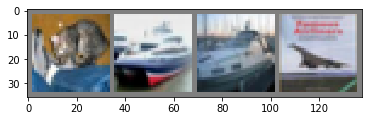

GroundTruth:    cat  ship  ship plane


In [17]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [18]:
outputs = vgg16(images.to(device))

In [19]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship plane


In [20]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = vgg16(images)
        
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 73 %


## GoogLeNet (a.k.a. Inception V1)  
  
GoogLeNet은 2014년도에 VGG를 제치고 가장 좋은 성적을 냈다. GoogLeNet은 parameter 수, 메모리 사용량, 계산량 등을 줄이는 등 효율성을 위해 많은 혁신을 이룬 모델이기도 하다. 이름에서부터 알 수 있듯이 구글에서 나온 모델이고, ILSVRC 대회에서 요구하는 지표인 사람의 정확도에 근접한 모델이다. 이 모델은 인셉션 모듈 (Inception Module)이라는 블록을 가지고 있어서 인셉션 네트워크라고도 불리는데, 다음 그림만 봐도 뭐가 이것저것 많이 들어가 있는 것을 알 수 있다.  
  
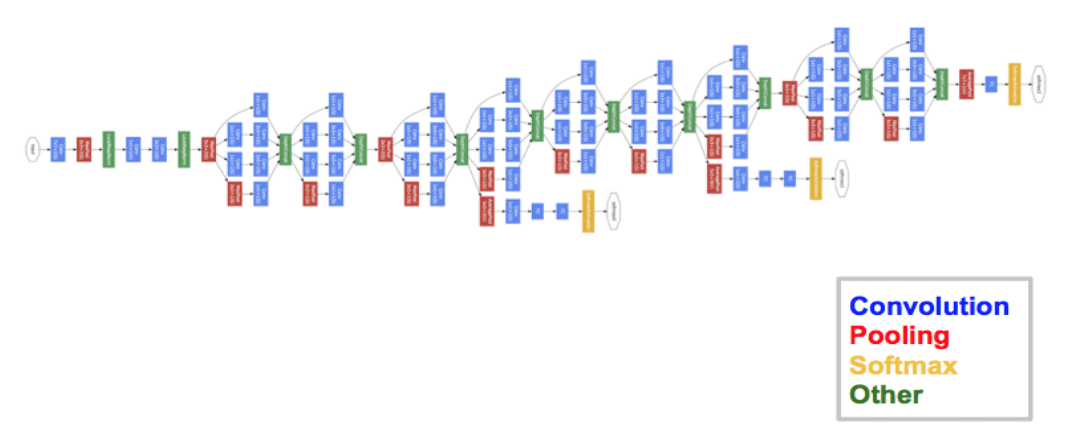  
  
구조는 22개의 CNN 층들을 기반으로 했으나, 작은 convolution을 기반으로 parameter수를 감소시켰다. (AlexNet 60 million -> 4 million)   
  
### GoogLeNet Design Rules  
  
**Stem network**  
초기에는 공격적으로 input을 downsampling한다. Convolution을 통해 연산을 하는데 이 과정은 학습에 큰 영향을 주며, 일반적인 CNN 모델과 같다. 그 이유는 앞부분에선 Inception의 효과가 나타나지 않았기 때문이다. 사이즈를 228x228에서 28x28로 줄이는데, VGG 16에 비해 훨씬 효율적이다.  
  
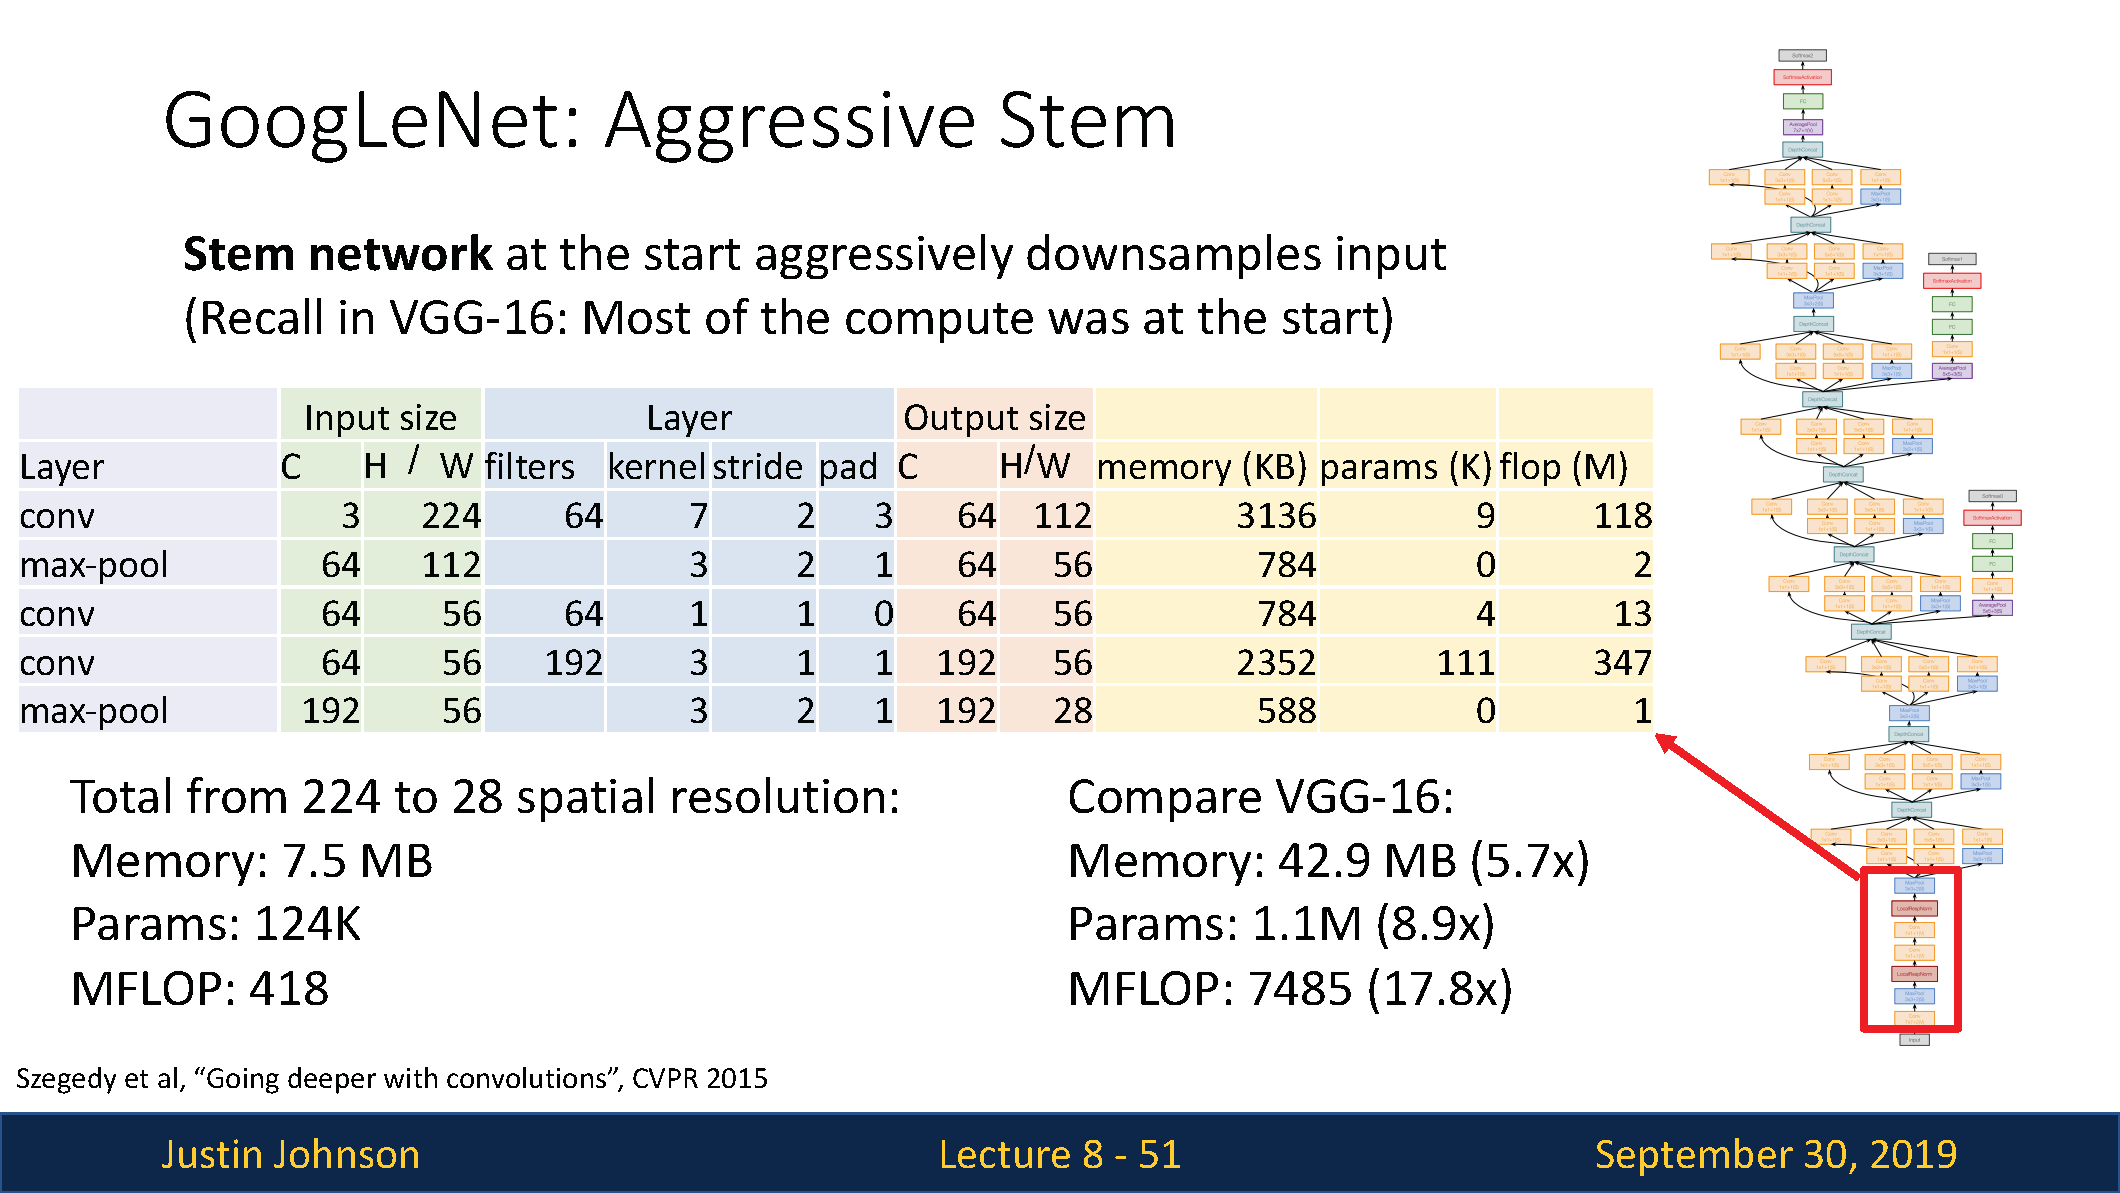  
  
**Inception Module**  
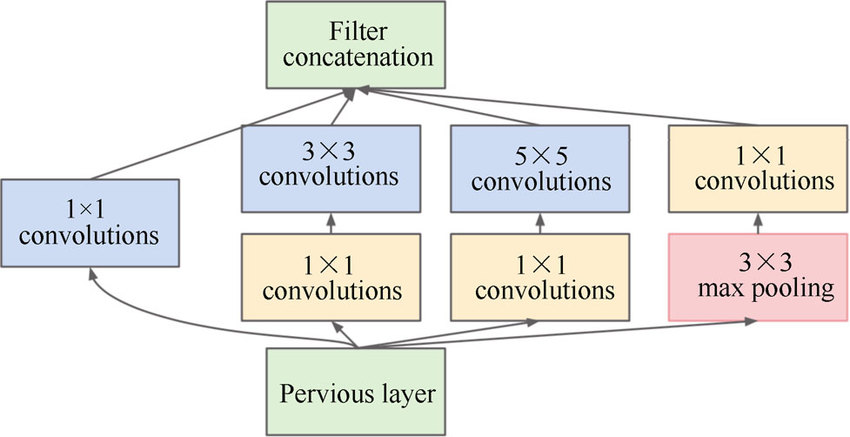  
  
전체 모델 구조를 보면 일정한 반복이 있는 것을 알 수 있다. 빨간색 블록(윗윗그림 기준)에서 시작해서 여러 갈래로 갈라졌다 모이는 부분이 인셉션 모듈에 해당하는데, 모듈을 확대해보면 위와 같다.  
GoogLeNet에는 총 9개의 인셉션 모듈이 반복되는데, 밑에서 설명하겠지만 1x1 conv는 특성맵(feature map)의 장수를 줄여주는 역할을 하고, 이전 단계의 활성화지도에 다양한 필터 크기로 합성곱 연산을 적용함으로써 좀 더 다양한 종류의 특성이 도출된다.
  
**1x1 Conv layer**  
**Q**. 1x1 컨볼루션은 어떻게 연산량을 줄여줄까?  
14x14x480짜리 feature map을 14x14x48 크기로 줄이고 싶다고 해보자.  
  
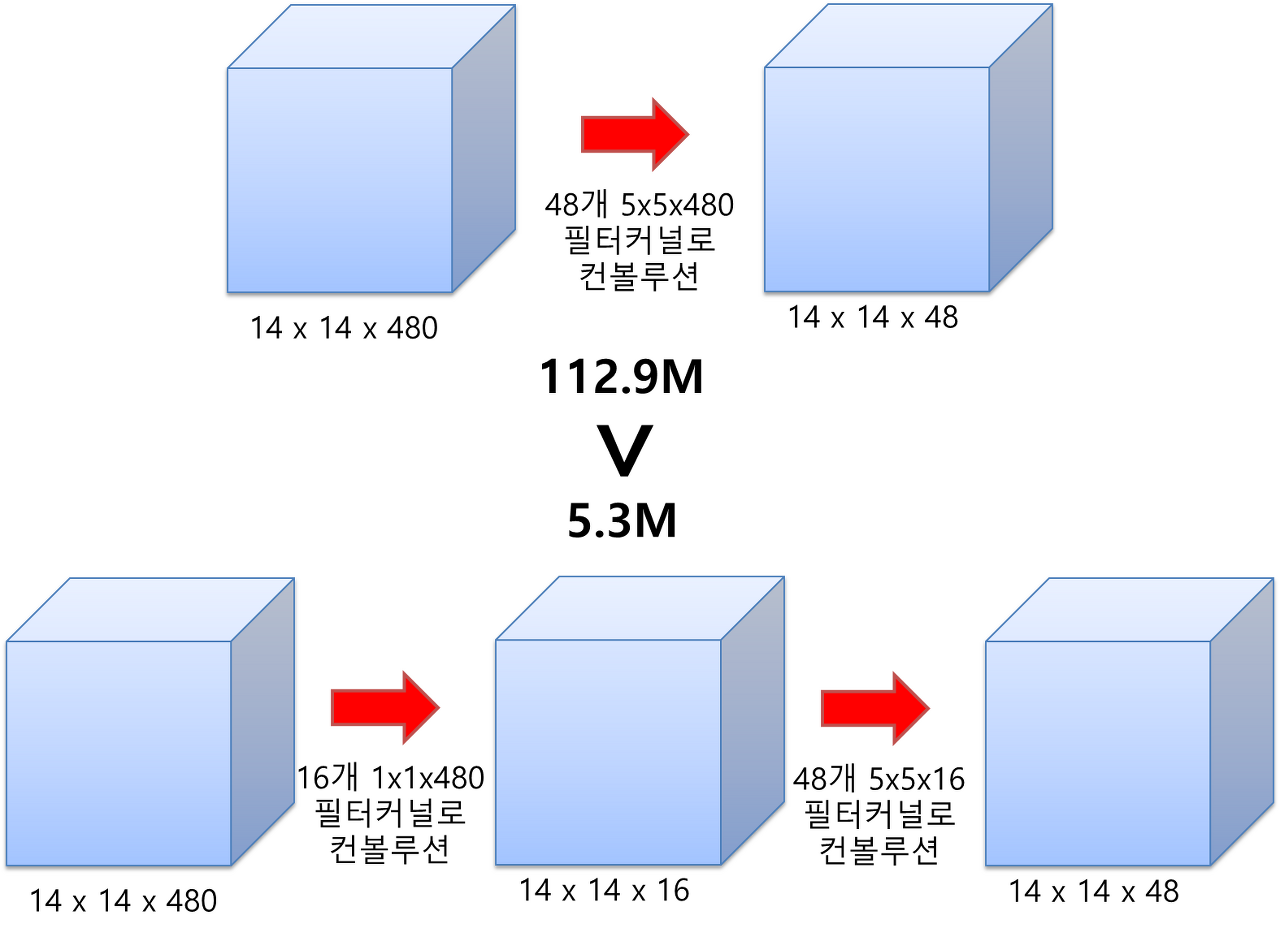  
  
먼저 중간에 1x1 컨볼루션을 거치지 않고 바로 크기를 줄이려면 48개 채널의 5x5 필터 커널로 컨볼루션하면 될 것이다. (크기 맞추기 위해 알맞은 stride=1와 padding=2 값을 준다. 그렇지만 계산량에 영향은 없음) 이 경우 필요한 연산 횟수는 $(14*14*48)*(5*5*480)=112.9M$이다.  
  
중간에 1x1 컨볼루션을 거칠 경우 필요한 연산 횟수는 $(14*14*16)*(1*1*480)+(14*14*48)*(5*5*16)=5.3M$이다. 연산량이 줄어들 수록 네트워크를 깊이 만들 수 있다.
  
**Global Average Pooling**  
GoogLeNet은 모델 끝에 fully connected layer가 없다! 대신 GoogLeNet은 모든 층에서 산출된 feature map들을 각각 평균낸 것들을 이어서 1차원 벡터를 만들어주는 global averate pooling이란 방식을 사용한다. 벡터가 1차원인 이유는 그래야 최종적으로 classification을 위한 softmax 함수에 넣을 수 있기 때문이다. 아래 그림을 보면 이해가 쉽다.  

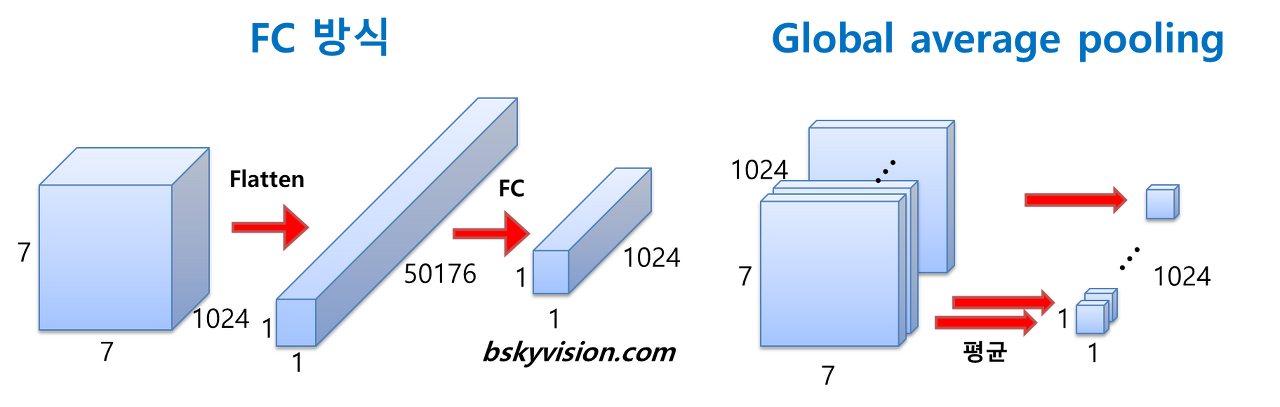  
  
이렇게 해줌으로써 또 parameter(가중치)의 수를 줄일 수 있다. 연산 결과 1024개 채널의 7x7 feature map이 나왔다고 할 때, fully connected layer를 이용할 경우 학습해야 할 가중치는 $7*7*1024*1024=51.3M$개이지만 global average pooling을 이용할 경우 **가중치가 단 한개도 필요하지 않다.**  
  
**Auxilary Classifier**  
저번 시간에 배웠듯, 네트워크를 깊게 쌓을수록 vanishing gradient 문제를 피하기 어려워진다. 이러한 문제를 해결하기 위해 GoogLeNet에서는 네트워크 중간에 두 개의 보조 분류기를 달아주었다. GoogLeNet은 layer가 깊기 때문에 오른쪽 맨 끝 위에서부터 오는 gradient에는 vanishing gradient 문제가 생길 수 있는데 중간중간 보조 분류기를 달아줌으로써 훈련 중간에도 이미지를 분류하고 loss를 받을 수 있다. 이 보조 분류기들은 훈련 시에만 사용되고 test 시에는 제거한다.  
   
  
url : https://bskyvision.com/539  
paper : https://arxiv.org/pdf/1409.4842.pdf  

## ResNet  
  
ResNet은 이미지넷 분류대회의 2015년도 우승자이다! ResNet은 네트워크를 얼마나 깊게 쌓을 수 있을까라는 의문에서 시작되었다. 이제까지 나온 모델들의 경우 일정 수준 잉상의 깊이가 되면 오히려 얕은 모델보다 깊은 모델의 성능이 더 떨어진다는 점을 발견했다.  
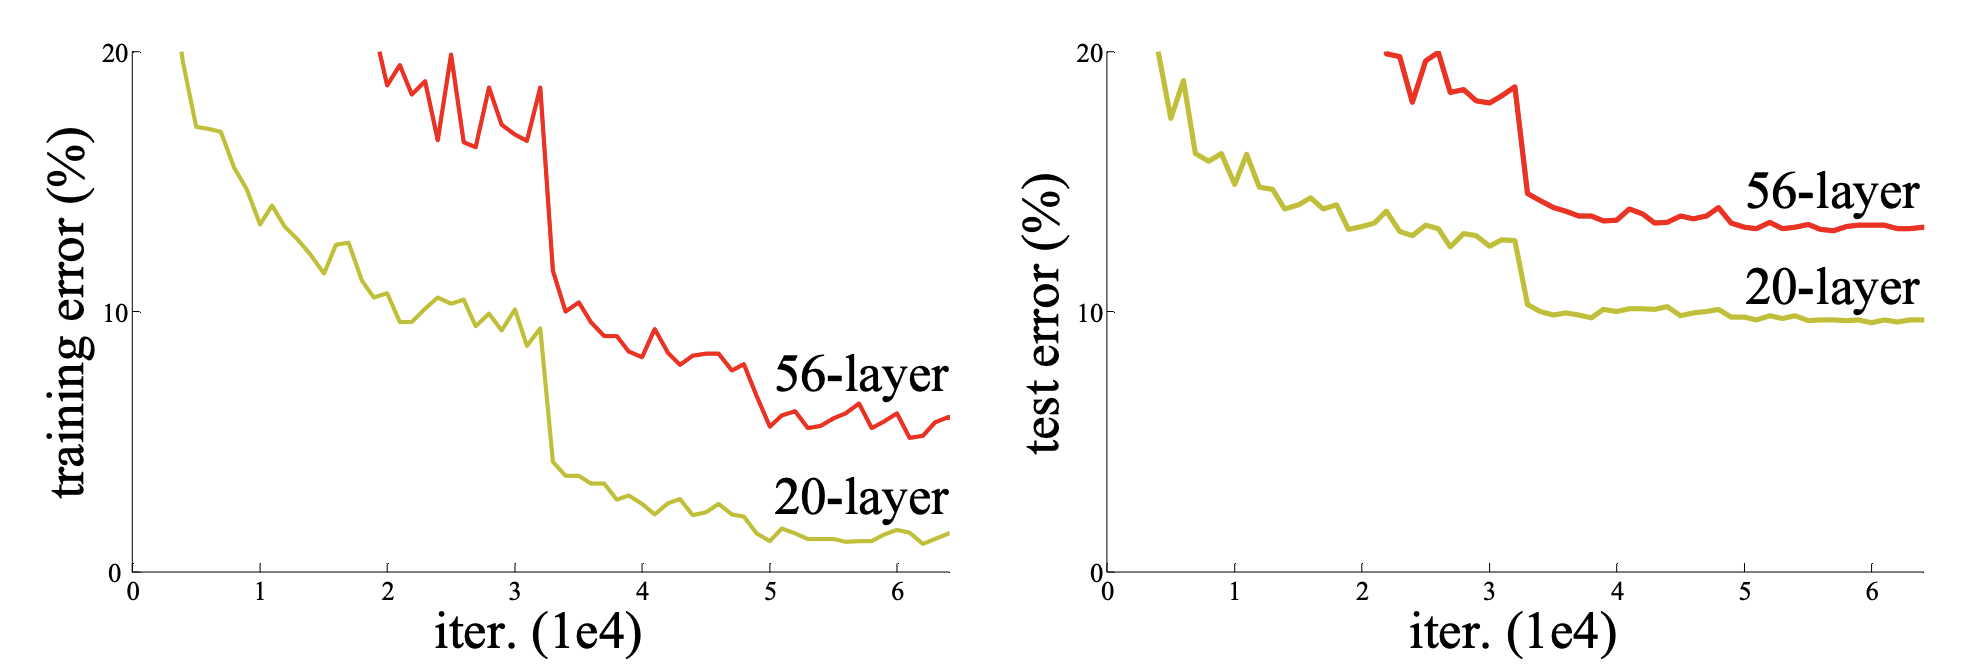  
이는 이미 여러 번 언급되었던 vanishing / exploding gradient 문제 때문이다. 우리가 생각하기에 모델이 깊을수록 예측력도 더 좋아질 것 같지만 위의 그림에서도 알 수 있듯이 20개 레이어로 이루어진 네트워크가 56개 레이어로 이루어진 네트워크보다 training error와 test error 측면에서 모두 낮았다. 
  
### 왜 Residual Network라고 불릴까?  
이러한 gradient 문제를 해결하기 위해, 아래와 같은 skip connection 방법을 도입했다. (shortcut을 추가하기 / skip-forward 등 부르는 방식은 다양함) 간단히 말해, 특정 위치에서 입력이 들어왔을 때 합성곱 연산을 통과한 결과와 입력으로 들어온 identity 두 가지를 더해서 다음 레이어에 전달하는 것이다. 
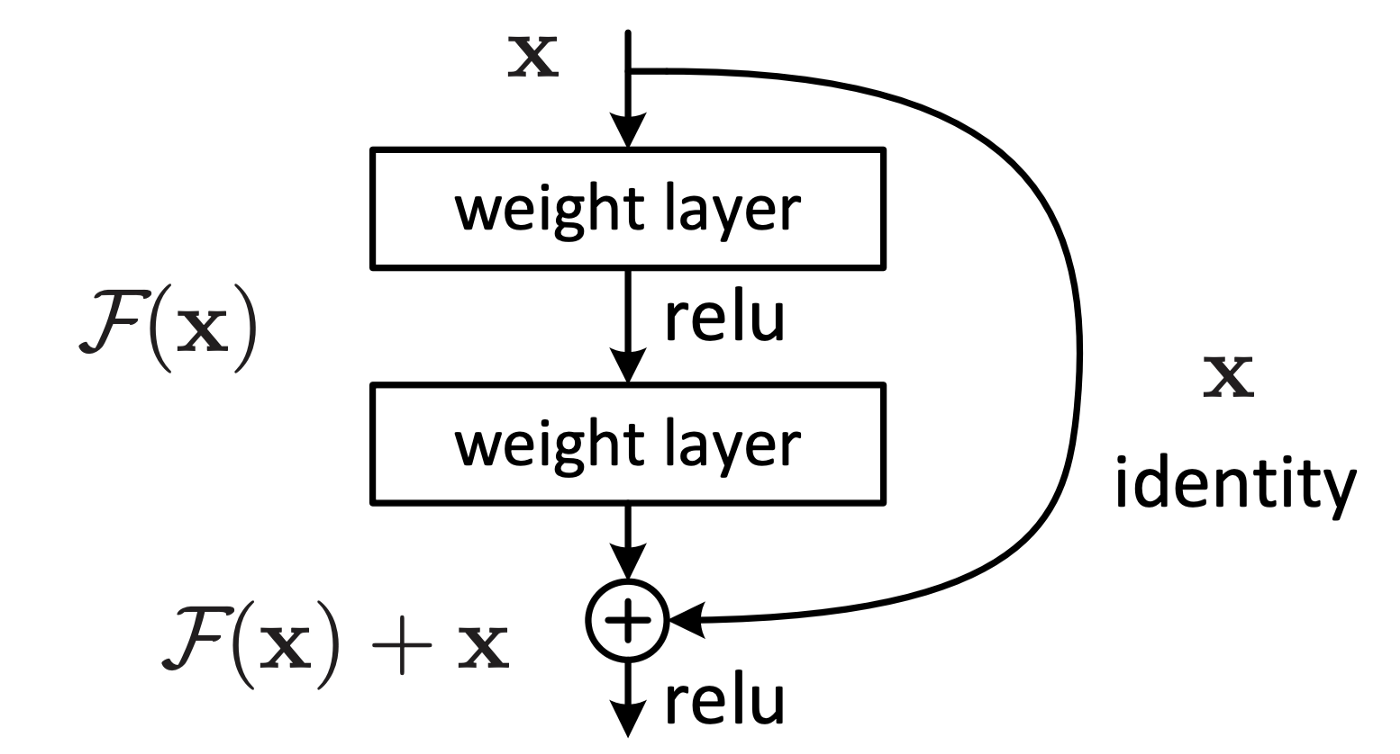  
  
아이디어 자체는 단순하지만 이는 매우 큰 효과를 낸다. 기존의 layer는 input x에 대해 H(x)에 대한 가중치를 학습한다. 하지만 Residual Learning에서 $H(x) = F(x) + x$가 되고 backpropagation 과정에서 weight layer가 학습하는 가중치는 $F(x) = H(x) - x$가 되고 weight layer는 일종의 residual mapping을 배우게 되는 것이다. 이 때 $H(x) - x$가 잔차(residual)이기 때문에 잔차학습이라는 이름이 붙게 된 것이다.  
또한, 이 경우, 가중치 레이어에 대해 소실되는 gradient가 있더라도, 우리에겐 여전히 이전 레이어로 전달해줄 수 있는 identity x가 있기 때문에 layer를 많이많이 쌓을 수 있다.  
  
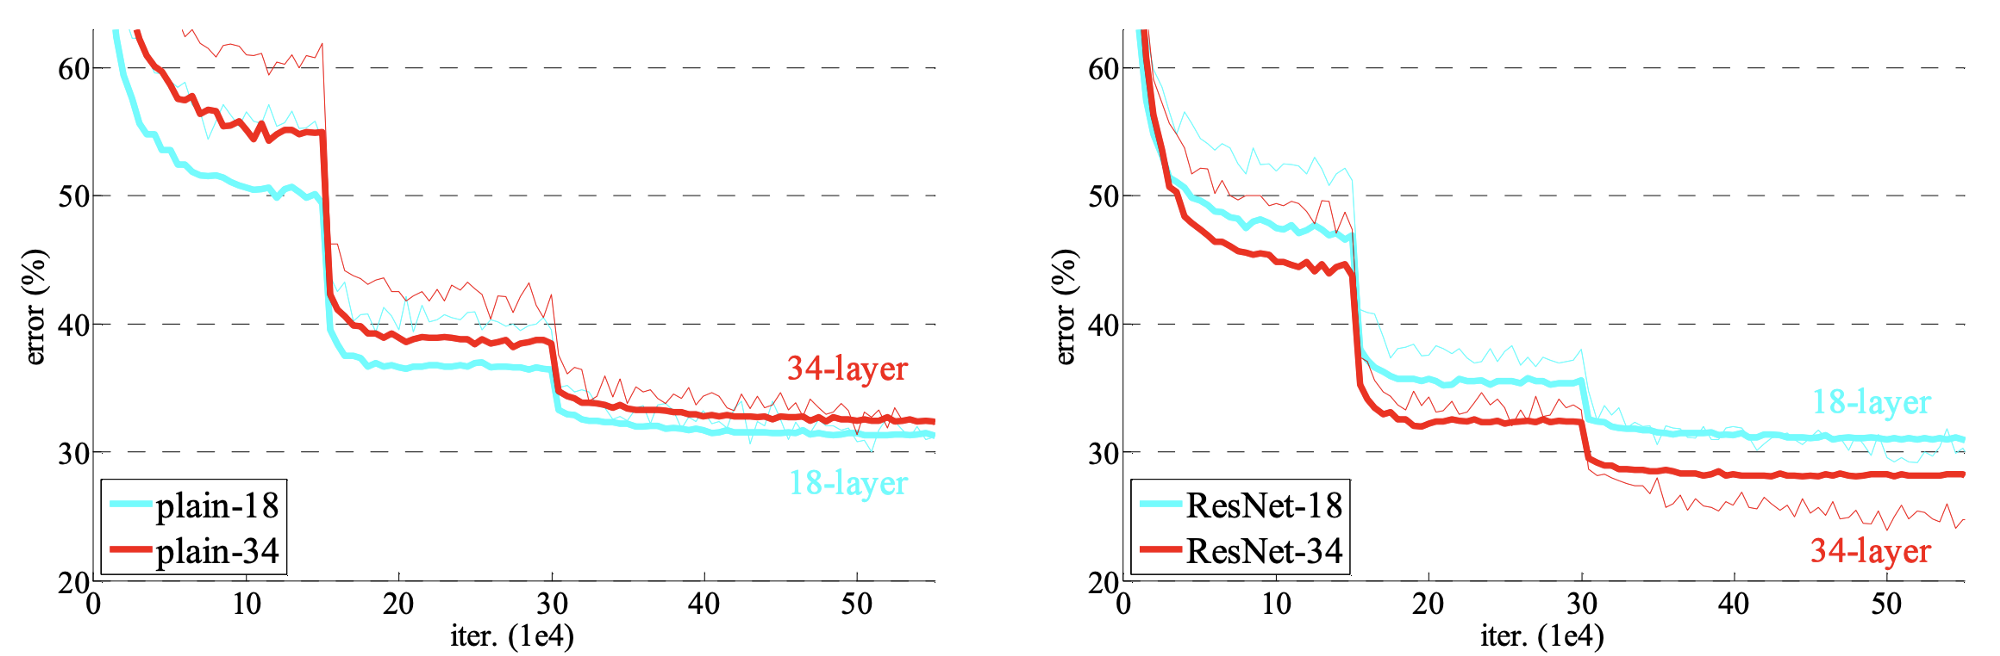  
  
실제로, ResNet의 경우 layer가 많을수록 error가 감소한다!  

paper : https://arxiv.org/pdf/1512.03385.pdf

### ResNet Design Rules  
  
**Bottleneck Block**  
ResNet은 기본적으로 레이어의 수가 많고 깊기 때문에 훈련하는데 시간과 메모리가 많이 소요된다. 
레이어의 수가 많지 않은 resnet18 / 32는 왼쪽의 기본 블록 (BasicBlock)를 사용하지만 그 수가 많은 resnet50이상의 모델들부터는 네트워크의 시작과 끝에 1x1 conv 레이어를 추가한 Bottleneck 디자인을 사용한다.  
  
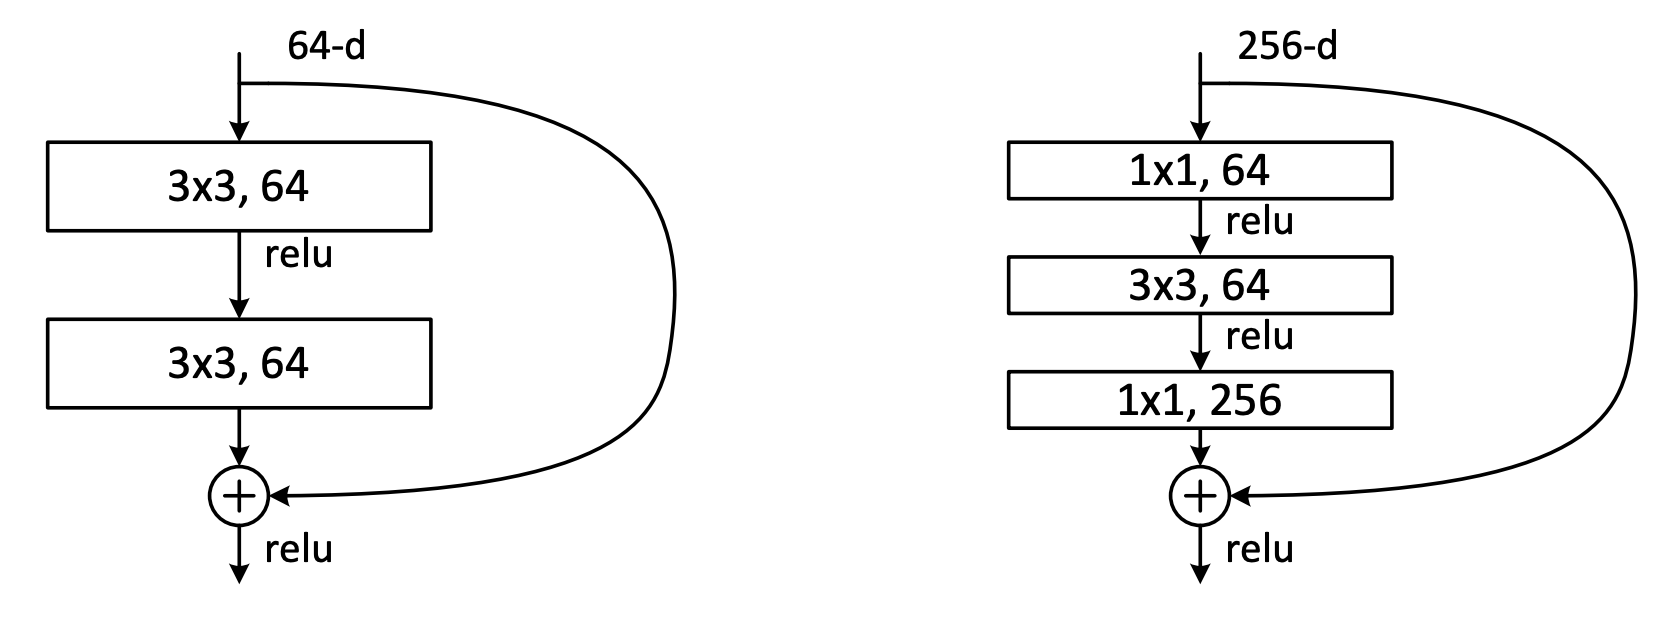  
  
이는 앞서 설명했던 GoogLeNet에서 제안된 기술인데 1x1 컨볼루션 레이어는 네트워크의 성능을 크게 저하시키지 않으면서 연결(parameter)의 수를 줄일 수 있다. 이 때문에 ResNet-152도 여전히 VGG-16 / VGG-19보다 복잡성이 낮다!  


In [5]:
class Bottleneck(nn.Module):
    # Bottleneck in torchvision places the stride for downsampling at 3x3 convolution(self.conv2)
    # while original implementation places the stride at the first 1x1 convolution(self.conv1)
    # according to "Deep residual learning for image recognition"https://arxiv.org/abs/1512.03385.
    # This variant is also known as ResNet V1.5 and improves accuracy according to
    # https://ngc.nvidia.com/catalog/model-scripts/nvidia:resnet_50_v1_5_for_pytorch.

    expansion = 4

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(Bottleneck, self).__init__()
        # Both self.conv2 and self.downsample layers downsample the input when stride != 1
        self.conv1 = conv1x1(inplanes, planes)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = conv3x3(planes, planes, stride)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = conv1x1(planes, planes * self.expansion) # 4배로 점프뛰기
        self.bn3 = nn.BatchNorm2d(planes * self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        identity = x

        out = self.conv1(x) # 1x1 stride = 1 (fixed)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out) # 3x3 stride = stride(input param)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out) # 1x1 stride = 1 (fixed)
        out = self.bn3(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out

**BasicBlock**   
\- for resnet18 / resnet32  
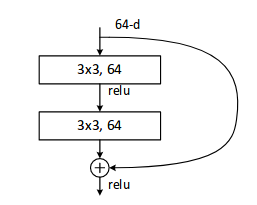
  
layer가 그렇게 깊지 않을 때 BasicBlock을 이용하여 layer를 쌓습니다. 그림에서 알 수 있듯 identity는 그 자신이 64개의 3x3 필터와 relu 층을 두 번 통과된 연산값과 더해집니다. 

In [6]:
class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        # Both self.conv1 and self.downsample layers downsample the input when stride != 1
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = nn.BatchNorm2d(planes)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        # x.shape = 3x64x64
        identity = x
        # identity.shape = 3x64x64
        out = self.conv1(x) # 3x3 stride = 2
        # out.shape = 3x32x32
        out = self.bn1(out)
        # out.shape = 3x32x32
        out = self.relu(out)
        # out.shape = 3x32x32

        out = self.conv2(out) # 3x3 stride = 1 (fixed)
        # out.shape = 3x32x32
        out = self.bn2(out)
        # out.shape = 3x32x32

        # downsampling : stride = 2
        if self.downsample is not None:
            identity = self.downsample(x)
        
        # 근데 여기서 덧셈 불가능!
        # out.shape = 3x32x32
        # identity.shape = 3x64x64
        # 그래서 위의 downsampling 단계가 필요한거임
        out += identity
        out = self.relu(out)

        return out

**전반적인 구조**  
ResNet의 전체적인 구조는 아래와 같다.  
  
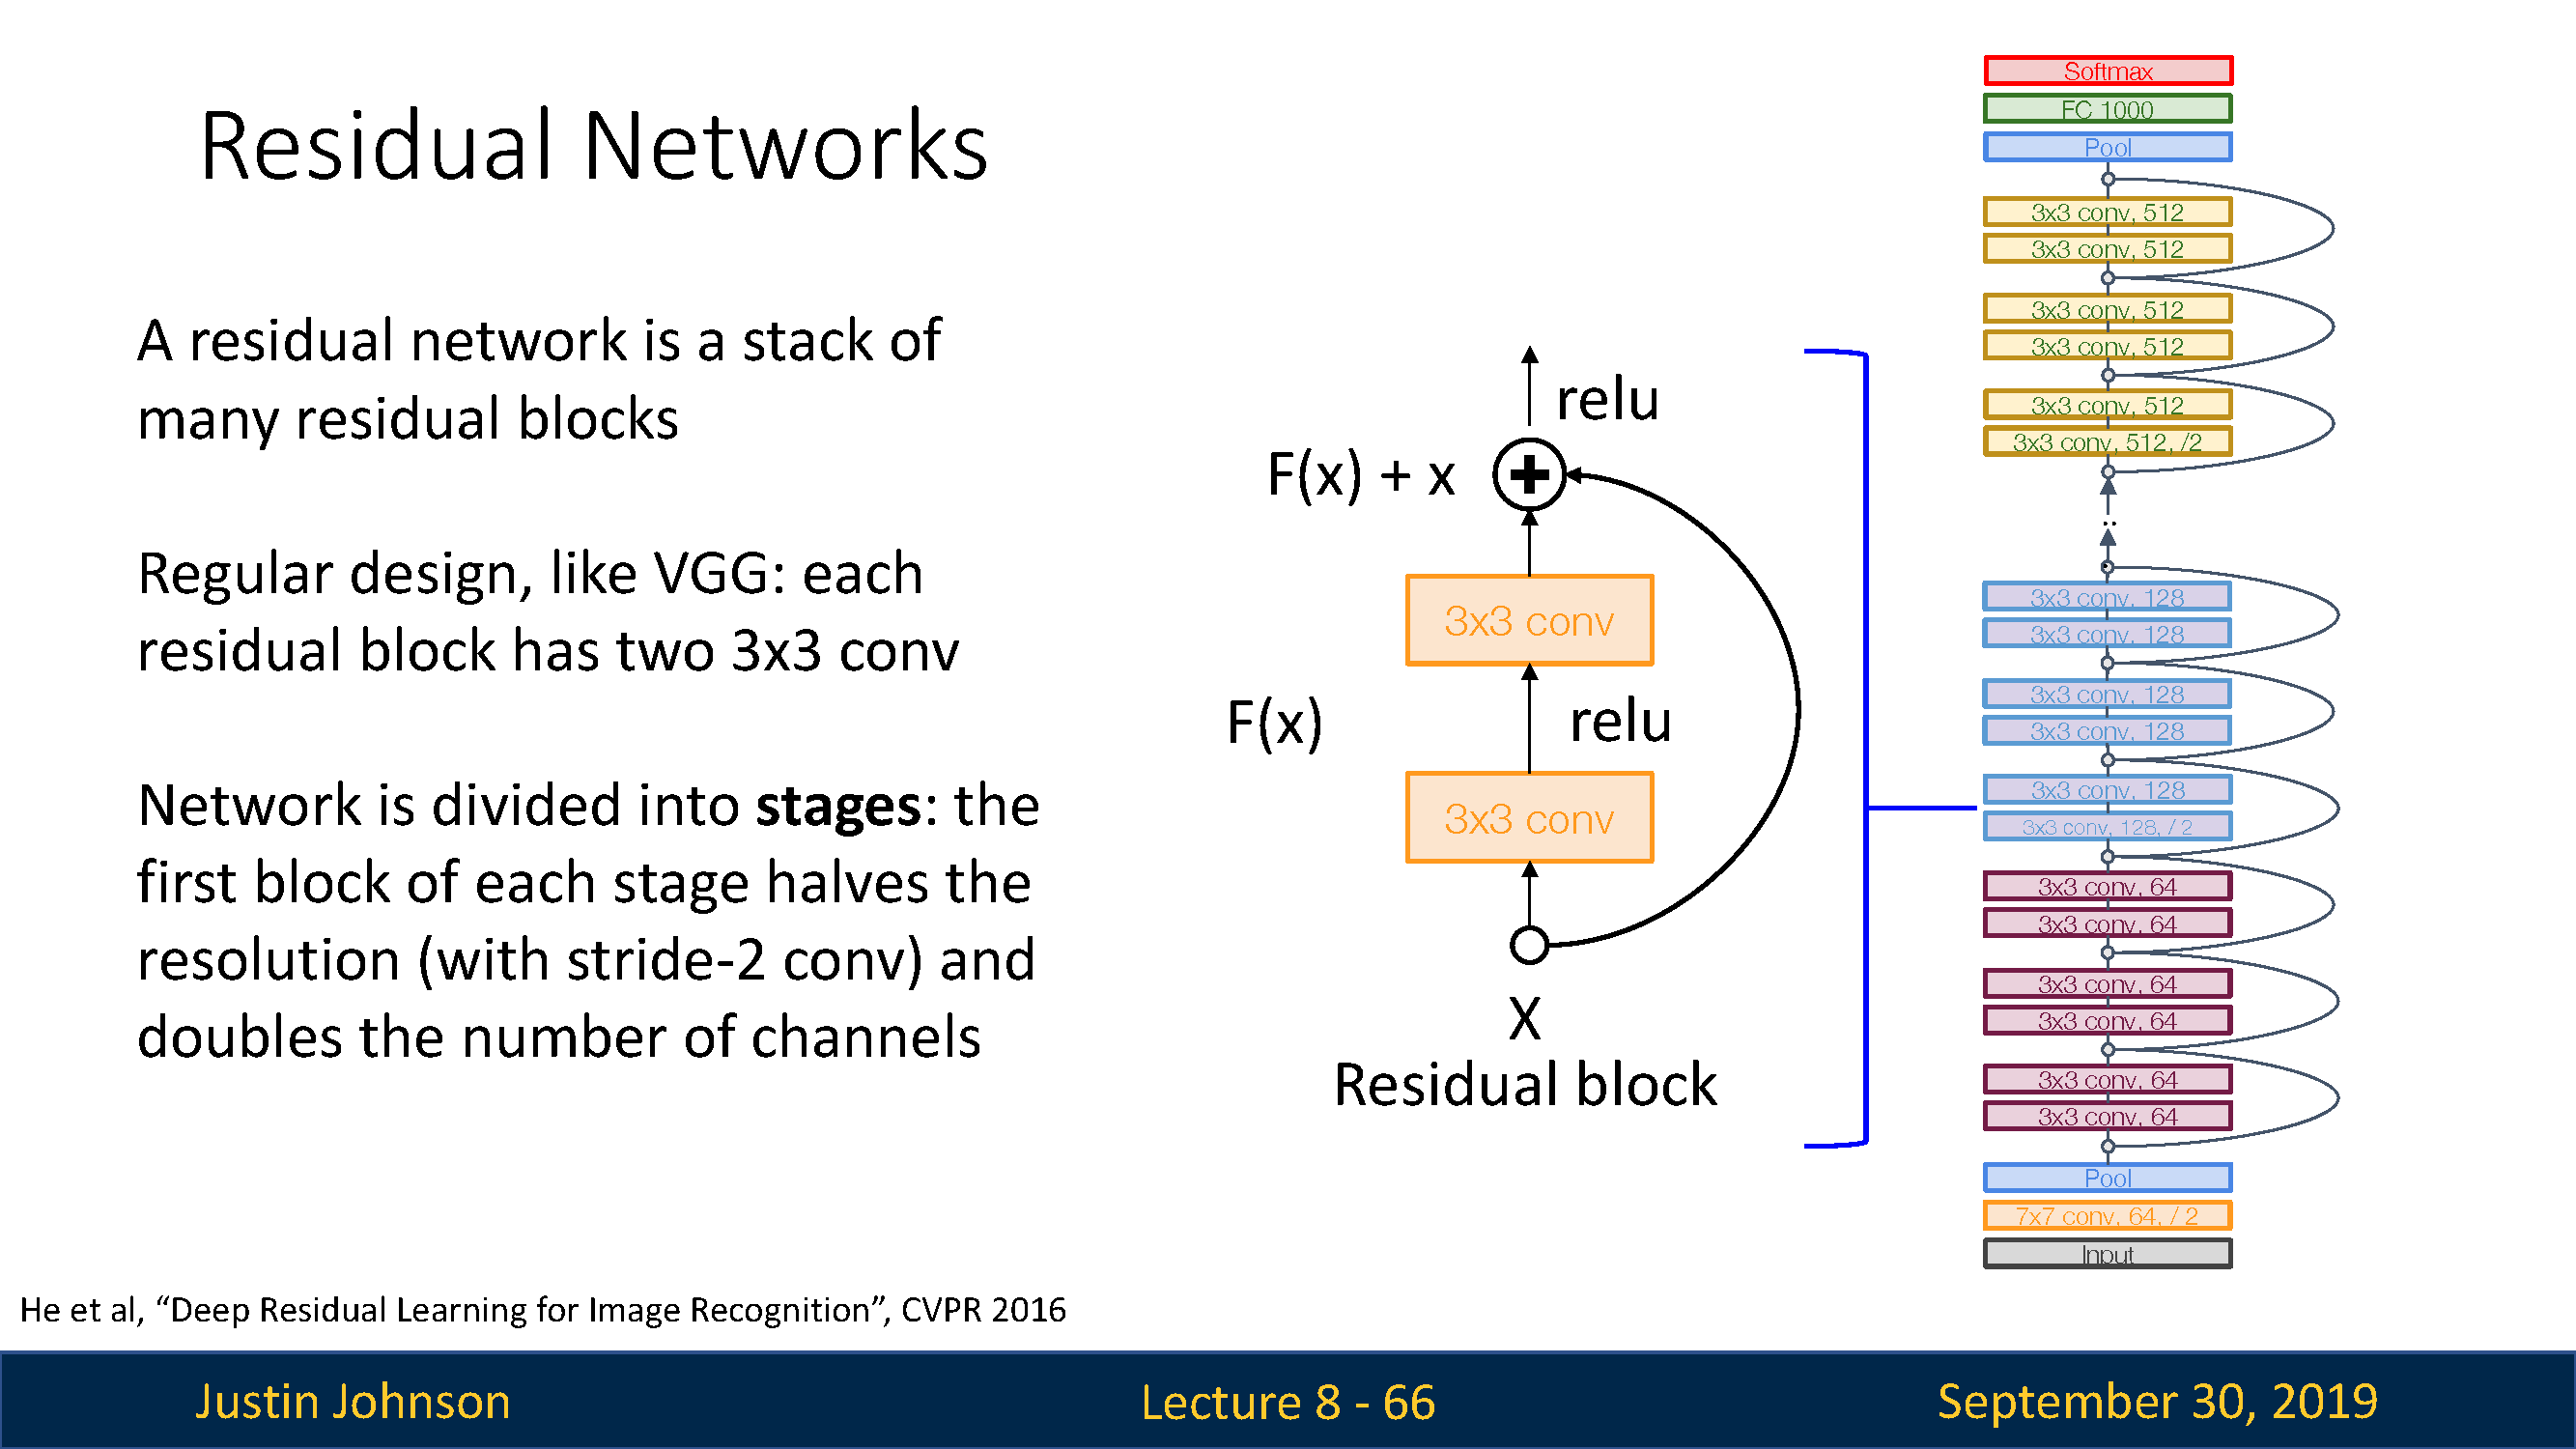  
ResNet은 기본적으로 VGG의 구성을 참고하여 설계되었기 때문에 각 블록들은 3개의 3x3 conv 레이어를 가지고 있다. 네트워크의 레이어는 stage로 나뉘는데 코드를 보면 알겠지만 총 4개의 stage (코드에선 layer라고 표현함)로 나뉘고 각 스테이지의 첫 번째 블록에서는 특성맵의 사이즈를 절반으로 줄이고 채널의 수는 두 배로 늘린다.  
  
네트워크의 초반과 후반은 GoogLeNet과 유사한 구조를 갖는다. 초기에 aggresive downsampling을 적용하고 말미에는 역시 fully-connected layer가 없고 대신 global average pooling을 적용한 뒤 single linear layer(softmax)를 통해 최종적으로 classification한다!   


### Source Code  

**import necessary packages**  
\- 원본 코드는 유튜브 더보기 란의 깃 링크 또는 파이토치 공식 깃을 참고하거나 위에 소개한 방법으로 직접 소스코드를 찾아볼 수 있다!  

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

# 사용할(만들) resnet 종류들 선언
__all__ = ['ResNet', 'resnet18', 'resnet34', 'resnet50', 'resnet101',
           'resnet152', 'resnext50_32x4d', 'resnext101_32x8d',
           'wide_resnet50_2', 'wide_resnet101_2']

# pre-trained된 모델들 웹에서 가져옴
model_urls = {
    'resnet18': 'https://download.pytorch.org/models/resnet18-5c106cde.pth',
    'resnet34': 'https://download.pytorch.org/models/resnet34-333f7ec4.pth',
    'resnet50': 'https://download.pytorch.org/models/resnet50-19c8e357.pth',
    'resnet101': 'https://download.pytorch.org/models/resnet101-5d3b4d8f.pth',
    'resnet152': 'https://download.pytorch.org/models/resnet152-b121ed2d.pth',
    'resnext50_32x4d': 'https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth',
    'resnext101_32x8d': 'https://download.pytorch.org/models/resnext101_32x8d-8ba56ff5.pth',
    'wide_resnet50_2': 'https://download.pytorch.org/models/wide_resnet50_2-95faca4d.pth',
    'wide_resnet101_2': 'https://download.pytorch.org/models/wide_resnet101_2-32ee1156.pth',
}

# 자주 사용할 함수 정의해주기
# in_planes : input channel 수
# out_planes : output channel 수
# conv1x1의 경우 stride는 무조건 1
def conv3x3(in_planes, out_planes, stride=1):
    """3x3 convolution with padding"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=1, bias=False)

def conv1x1(in_planes, out_planes, stride=1):
    """1x1 convolution"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False)

**CIFAR10 image training/testing**  
프로세스는 VGG의 경우와 동일하고 training / testing 블록의 아래 부분만 resnet50으로 바꾸면 되므로 생략하겠습니다.

In [ ]:
# training
for epoch in range(epochs):
    ...
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        ...
        outputs = resnet50(inputs)
        ...
print('Finished Training')

# model accuracy testing
with torch.no_grad():
    for data in testloader:
        ...
        outputs = resnet50(images)
        ...
print('Accuracy: %d %%' % (100 * correct / total))

**sanity check**   
    `resnet18(input)`을 호출하면 안에서 어떤 연산이 이루어지고 resnet이 어떻게 구현되는지 알아봅시다.  
    (아래 코드는 설명과 이해를 돕기 위해 순서를 조정하여 처음부터 커널을 실행할 경우 오류가 발생하니 아래는 코드를 이해하기 위해 주석만 봐주시고 실제 실행은 lab code를 참조해주세요!)  

In [21]:
# sanity check
# 제대로 작동하는지 확인해봅시다!
a = torch.Tensor(1, 3, 64, 64).to(device)
print(a.shape)
out = resnet50(a)

torch.Size([1, 3, 64, 64])


resnet50(a)를 호출하면 다음과 같이 정의된 resnet50에 3 x 32 x 32 사이즈의 입력값이 들어가게 됩니다.

In [23]:
resnet50 = ResNet(Bottleneck, [3, 4, 6, 3], 10, True).to(device)

이 말은 곧, 우리는 Bottleneck 블록을 사용해서 layer 1-2-3-4에 블록이 각각 3-4-6-3개가 들어가도록 모델을 쌓을 것이고, 분류될 클래스는 총 10개라는 걸 의미합니다. ResNet 클래스의 parameter들은 다음과 같습니다.  
* block : 어떤 블록으로 쌓을건지! BasicBlock / Bottleneck  
    BasicBlock은 layer 수가 적은 resnet18, resnet32에 사용되고 Bottleneck은 그 이상인 resnet50부터 사용됩니다.  
* layers : ResNet은 총 4개의 layer를 갖는데 각 layer 당 블록의 수를 list 형태로 받습니다.  
* num_classes : CIFAR10의 경우 총 10개의 클래스가 있으니 값은 10이 됩니다.  
* zero_init_residual : True가 좋을 수도 있고 False가 좋을 수도 있습니다.  
  


In [15]:
class ResNet(nn.Module):
    
    def __init__(self, block, layers, num_classes=1000, zero_init_residual=False):

        super(ResNet, self).__init__()
        
        self.inplanes = 64 # inplanes는 채널의 수를 의미합니다.
        # input.shape = 64x224x224
        self.conv1 = nn.Conv2d(3, self.inplanes, kernel_size=7, stride=2, padding=3,
                               bias=False)
        # output = self.conv1(input)
        # output.shape = 64x112x112
        # O = floor((I-K+2P)/S + 1) = floor((224-7+6)/2 + 1) = 112
        self.bn1 = nn.BatchNorm2d(self.inplanes)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        # output.shape = 64x56x56
        # O = floor((112-3+2)/2 + 1) = 56
        # 여기까지가 잔차학습을 시작하기 전 네트워크의 초입! GoogLeNet과 유사
        
        # 4개의 stage (각각 블록 3-4-6-3개로 구성된다)
        self.layer1 = self._make_layer(block, 64, layers[0]) # 3
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2) # 4
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2) # 6
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2) # 3
        
        # 네트워크의 말미! Average Pooling과 Linear layer를 통과한다.
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

        # weight 초기화
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

        # Zero-initialize the last BN in each residual branch,
        # so that the residual branch starts with zeros, and each residual block behaves like an identity.
        # This improves the model by 0.2~0.3% according to https://arxiv.org/abs/1706.02677
        if zero_init_residual:
            for m in self.modules():
                if isinstance(m, Bottleneck):
                    nn.init.constant_(m.bn3.weight, 0)
                elif isinstance(m, BasicBlock):
                    nn.init.constant_(m.bn2.weight, 0)
    
    # self.inplanes = 64
    # self.layer1 = self._make_layer(Bottleneck, 64, 3)
    # after building layer1, self.inplanes = 256
    # self.layer2 = self._make_layer(Bottleneck, 128, 4)
    def _make_layer(self, block, planes, blocks, stride=1):
        
        downsample = None
        
        if stride != 1 or self.inplanes != planes * block.expansion:
            # 64 != 64 * 4 @ layer1
            # stride=2니까 downsample 사용 @ layer2
            downsample = nn.Sequential(
                # layer1 : conv1x1(64, 256, stride=1)
                # layer2 : conv1x1(256, 128 * 4, stride=2 )
                conv1x1(self.inplanes, planes * block.expansion, stride),
                nn.BatchNorm2d(planes * block.expansion),
            )

        layers = []
        # 각 스테이지의 첫 번째 블록에서는 downsampling!
        # layers.append(BottleNeck(64, 64, 1, downsample))
        # layers.append(BottleNeck(256, 128, 2, downsample))
        layers.append(block(self.inplanes, planes, stride, downsample))
        
        self.inplanes = planes * block.expansion
        # 64 * 4 @ layer1
        # 128 * 4 @ layer2
        
        for _ in range(1, blocks): # 반복문 실행 횟수 (*2 @ layer1 / *3 @ layer2) 
            layers.append(block(self.inplanes, planes))

        return nn.Sequential(*layers)
    # *layers는 layers list에 있는 모듈을 nn.Sequential() 안에 쌓아준다.
                          
    # self.layer1 = [
        # Bottleneck(64, 64, 1, downsample)
        # Bottleneck(256, 64)
        # Bottleneck(256, 64)
    #]
    # self.layer2 = [
        # Bottleneck(256, 128, 2, downsample)
        # Bottleneck(512, 128) # planes = 128은 고정
        # Bottleneck(512, 128)
        # Bottleneck(512, 128)
    #]
                          
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        # x = torch.flatten(x, 1)
        x = x.view(x.size(0), -1)
        x = self.fc(x)

        return x

In [20]:
out.shape

torch.Size([1, 10])

#### 참고)  
ResNet 구현 코드에 자세히 주석을 달아놓은 블로그가 있길래 첨부합니다!  
url : https://blog.naver.com/kimhanju7/221516817948  

## Wrap-up  

### Comparing Complexity  
다음 두 슬라이드는 유명한 CNN 모델들의 accuracy, 메모리 사용량, 연산량, 그리고 학습해야 할 parameter의 수를 비교한 그래프이다.  
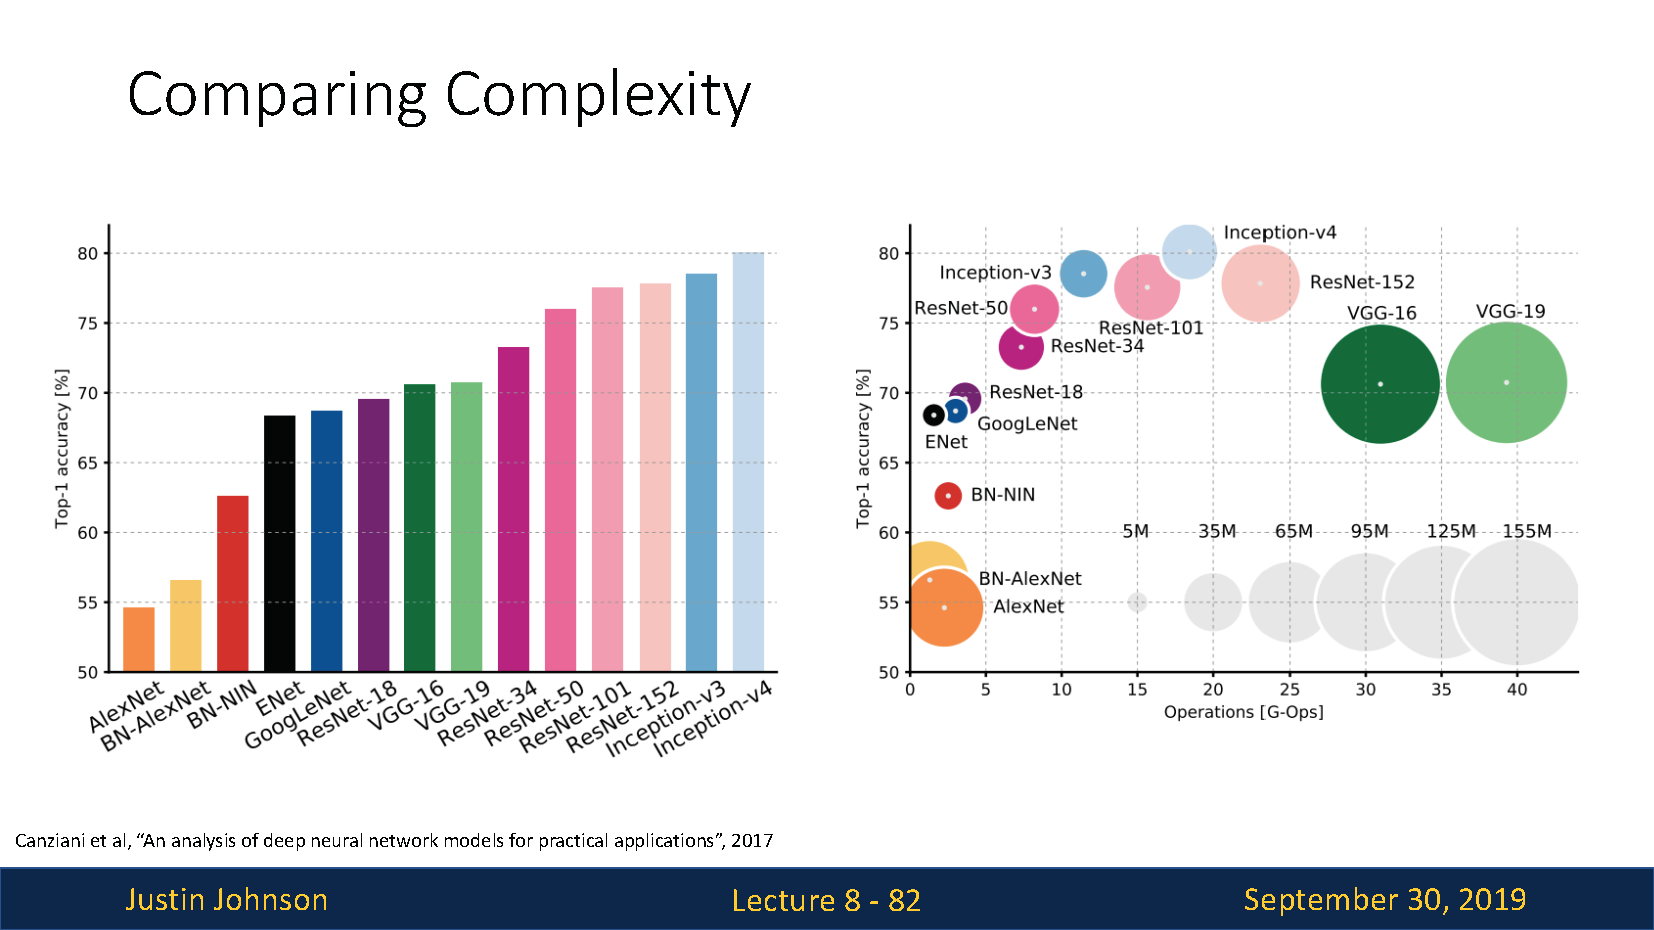  
  
위에서 설명한 바와 같이 VGG는 연산량이 매우 큰 편이다. 그에 비해 ResNet은 layer가 더 많음에도 불구하고 연산량은 훨씬 적고, 정확도는 더 높다. 또한, GoogLeNet을 필두로 한 Inception 모델은 그보다도 더 연산량이 적은 효율적인 모델임을 알 수 있다!  
  
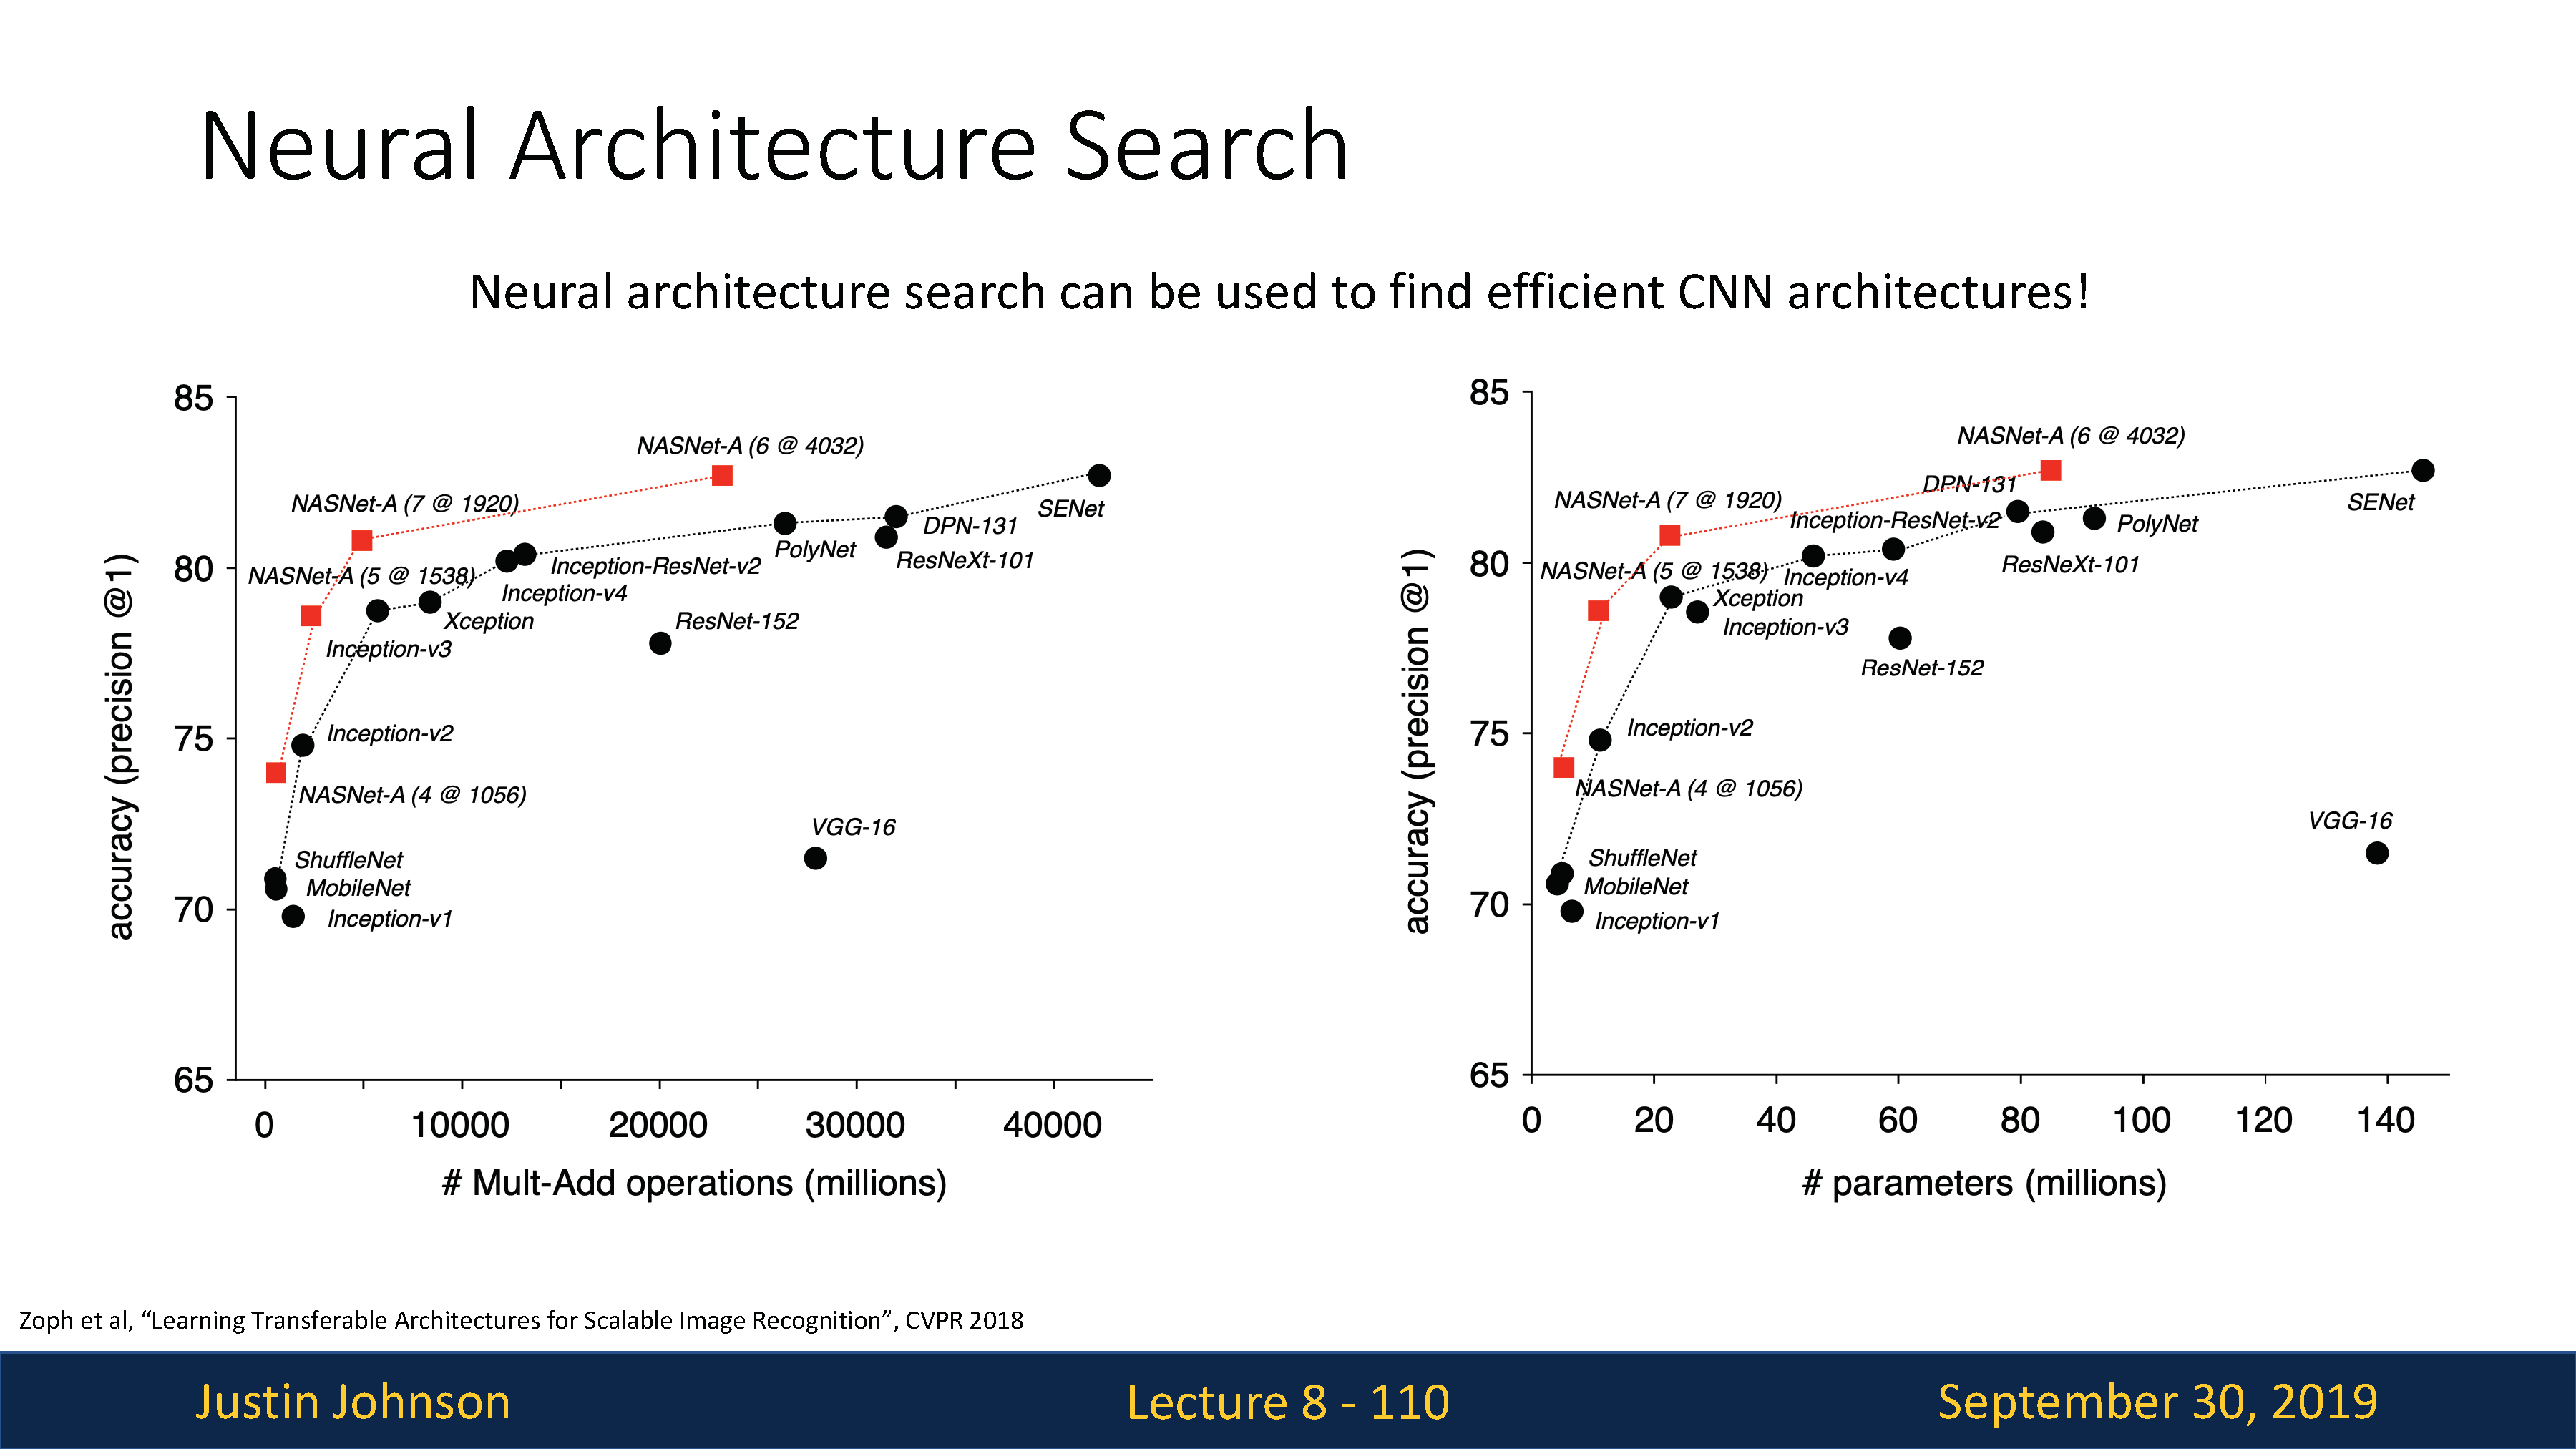  
  
2017년 발표되어 좋은 성적을 낸 SENet의 경우 accuracy도 가장 높지만 그만큼 연산량과 학습량이 많다! ROC curve 처럼 좌상단에 있을수록 가성비 좋고 정확한 모델이라고 할 수 있겠는데 붉은 그래프로 표시된 NasNet은 AutoML로 설계한 모델이고 매우 놀라운 결과이다. AutoML은 쉽게 말하면 머신러닝으로 설계하는 머신러닝인데, 자세한 내용은 아래 링크를 참조하면 알 수 있다!  
NasNet을 제외하고 검은 그래프들 중에는 역시 Inception 계열의 가성비가 좋다.
  
AutoML : https://research.sualab.com/review/2018/09/28/nasnet-review.html
  
### The Next Step of CNN  
  
UMich slide : https://web.eecs.umich.edu/~justincj/teaching/eecs498/schedule.html  
Stanford lecture : https://www.youtube.com/watch?v=DAOcjicFr1Y
를 참조하여 세션 자료를 준비했습니다!  
미시간 대학교의 슬라이드가 개인적으로 잘 정리되어 있는 듯 하니 ResNet 이후에 2016년도부터는 어떤 모델들이 어떤 방식으로 accuracy를 높였는지 참고하면 좋을 듯 합니다:)

## 숙제 :)  

### 1. colab GPU를 사용해서 VGG 돌려보기  
**코드는 링크를 참조**  
https://github.com/deeplearningzerotoall/PyTorch/blob/master/lab-10_5_2_Aadvance-CNN(VGG_cifar10).ipynb  
1. **cfg**만 **수정** (16개 + 3개의 Fully Connected Layer)  
  
2. **epoch은 30번**

In [ ]:
import torch
import torch.nn as nn

import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import visdom

import warnings
warnings.filterwarnings('ignore')

In [ ]:
print(len(trainloader))
epochs = 

for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    lr_sche.step()
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        outputs = 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 30 == 29:    # print every 30 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 30))
            running_loss = 0.0

print('Finished Training')

### 2. colab GPU로 ResNet 돌려보기  
1. **ResNet34** : block은 **BasicBlock** 사용하고, layer는 ResNet50처럼 **[3, 4, 6, 3]** 사용 

2. **epoch 30번까지** 

In [ ]:
print(len(trainloader))
epochs = 

for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    lr_sche.step()
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        outputs = 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 30 == 29:    # print every 30 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 30))
            running_loss = 0.0

print('Finished Training')